
#**MASTER DATA SCIENCE:** Nuclio Digital School

## **ENTREGABLE 1:** Data Preparation - BMW Pricing


# **Librerias y archivo**

In [7]:
import pandas as pd # Manipulacion y analisis de datos
import numpy as np # Libreria para la mainupalcion de datos y la ejecucion de operaciones matematicas
import matplotlib.pyplot as plt # Libreria para visualizar datos
import seaborn as sns # Libreria para visualizar datos
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder, OneHotEncoder # Libreria para crear modelos de ML


In [8]:
from google.colab import drive # importar drive

In [9]:
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
FILE = 'C:\Users\miiki\Desktop\DATA_SCIENCE\APRENDIZAJE_PYTHON\venvs\Nuclio\entregables\Entregable_1_Data_Clean_Preprocessing\data\bmw_pricing.csv'

In [12]:
df_bmw= pd.read_csv(FILE)

# **DATA CLEANING**

##**00.EDA**

Hacemos un **estudio inicial** de la tabla y las variables.  Visualizamos variables (tipo de variable, nulos), estadísticos iniciales y recuento de valores únicos.

In [13]:
df_bmw.head(10)

marca modelo        km  potencia fecha_registro tipo_gasolina   color  \
0   NaN    118  140411.0     100.0     2012-02-01        diesel   black   
1   BMW     M4   13929.0     317.0            NaN        petrol    grey   
2   BMW    320  183297.0     120.0     2012-04-01        diesel   white   
3   BMW    420  128035.0     135.0            NaN        diesel     red   
4   BMW    425   97097.0     160.0            NaN        diesel  silver   
5   BMW    335  152352.0     225.0     2011-05-01        petrol   black   
6   BMW    325  205219.0     145.0            NaN        diesel    grey   
7   BMW    118  115560.0     105.0     2009-08-01        petrol   white   
8   NaN     Z4  123886.0     125.0            NaN        petrol   black   
9   BMW    320  139541.0     135.0            NaN        diesel   white   

    tipo_coche volante_regulable aire_acondicionado camara_trasera  \
0          NaN              True               True          False   
1  convertible              True               True          False   
2          NaN             False              False          False   
3  convertible              True               True          False   
4          NaN              True               True          False   
5          NaN              True               True          False   
6  convertible              True               True          False   
7  convertible              True               True          False   
8  convertible              True              False          False   
9  convertible             False              False          False   

  asientos_traseros_plegables elevalunas_electrico bluetooth   gps  \
0                         NaN                 True       NaN  True   
1                         NaN                False      True  True   
2                         NaN                 True     False  True   
3                         NaN                 True      True  True   
4                       False                False      True  True   
5                       False                 True      True  True   
6                         NaN                 True      True  True   
7                         NaN                False      True  True   
8                       False                False       NaN  True   
9                         NaN                 True     False  True   

  alerta_lim_velocidad   precio fecha_venta  
0                  NaN  11300.0  2018-01-01  
1                 True  69700.0  2018-02-01  
2                False  10200.0  2018-02-01  
3                  NaN  25100.0  2018-02-01  
4                 True  33400.0  2018-04-01  
5                 True  17100.0  2018-02-01  
6                 True  12400.0  2018-02-01  
7                False   6100.0  2018-02-01  
8                False   6200.0  2018-03-01  
9                False  17300.0  2018-03-01

In [14]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [15]:
df_bmw.nunique()

marca                             1
modelo                           76
km                             4784
potencia                         61
fecha_registro                  180
tipo_gasolina                     5
color                            10
tipo_coche                        8
volante_regulable                 2
aire_acondicionado                2
camara_trasera                    2
asientos_traseros_plegables       2
elevalunas_electrico              2
bluetooth                         2
gps                               2
alerta_lim_velocidad              2
precio                          437
fecha_venta                      13
dtype: int64

In [16]:
df_bmw.describe()

km     potencia         precio
count  4.841000e+03  4842.000000    4837.000000
mean   1.409593e+05   128.981826   15831.920612
std    6.020853e+04    38.994839    9222.630708
min   -6.400000e+01     0.000000     100.000000
25%    1.028840e+05   100.000000   10800.000000
50%    1.410800e+05   120.000000   14200.000000
75%    1.752170e+05   135.000000   18600.000000
max    1.000376e+06   423.000000  178500.000000

Aquí creamos **dos funciones**:

La **primera función** nos muestra la **distribución de los valores según el tipo de variable**.Si la variable es **numérica** (int o float), visualizamos por **histograma**. Si la variable es **categórica o booleana**, hace un **recuento de valores únicos**.


La **segunda función** nos muestra el **porcentaje de nulos** por columna, ordenados en **orden descendente**.

Además  **declaramos dos variables más**. La  **primera** visualiza el **porcentaje de nulos por registro** y  la **segunda** realiza una agrupación que cuenta el **total de columnas nulas que encontramos por registros**.

In [17]:
# Distribución de las variables según el tipo de variable
def EDA_variables (dataframe):
  for column in dataframe.columns:
    if  dataframe[column].dtypes.kind == 'f' or dataframe[column].dtypes.kind== 'i':
      print(dataframe.hist(column))

    elif dataframe[column].dtypes.kind== 'O' or dataframe[column].dtypes.kind== 'b':
      print(dataframe[column].value_counts(normalize=True))


In [18]:
# Obtener dataframe con procentajes de nulos
def get_nulos(dataframe):
  df_nulos= pd.DataFrame(
      {'columna': dataframe.columns,
        'cant.nulos': dataframe.isnull().sum(),
        '% nulos': ((dataframe.isnull().mean())*100).round(2)
      }
  )
  return df_nulos.sort_values( by= '% nulos', ascending = False).reset_index(drop=True)

marca
BMW    1.0
Name: proportion, dtype: float64
modelo
320                  0.155372
520                  0.130785
318                  0.117355
X3                   0.090496
116                  0.073967
                       ...   
216                  0.000207
220 Active Tourer    0.000207
 Active Tourer       0.000207
225 Active Tourer    0.000207
214 Gran Tourer      0.000207
Name: proportion, Length: 76, dtype: float64
[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
fecha_registro
2013-07-01    0.038430
2014-03-01    0.034298
2014-05-01    0.033471
2013-01-01    0.032231
2013-10-01    0.031818
                ...   
2004-11-01    0.000413
2009-12-01    0.000413
2005-02-01    0.000413
2004-06-01    0.000413
2005-09-01    0.000413
Name: proportion, Length: 180, dtype: float64
tipo_gasolina
diesel           0.957214
petrol           0.039479
hybrid_petrol    0.001654
Diesel           0.001033
electro          0.000620
Name: proportion, dtype: float64
c

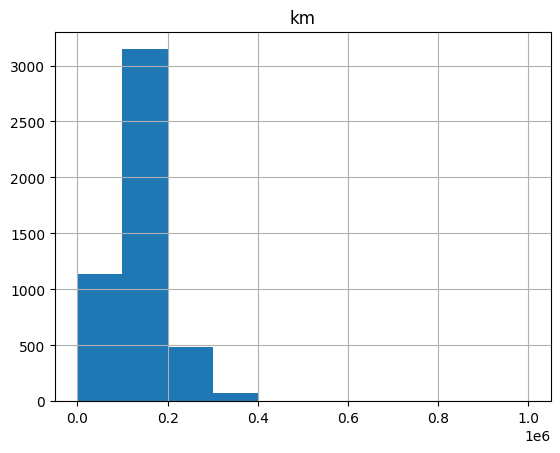

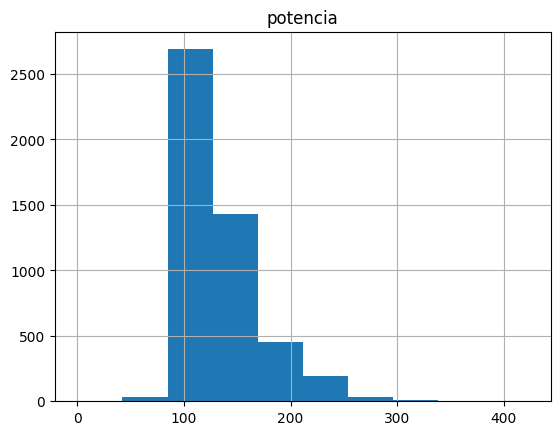

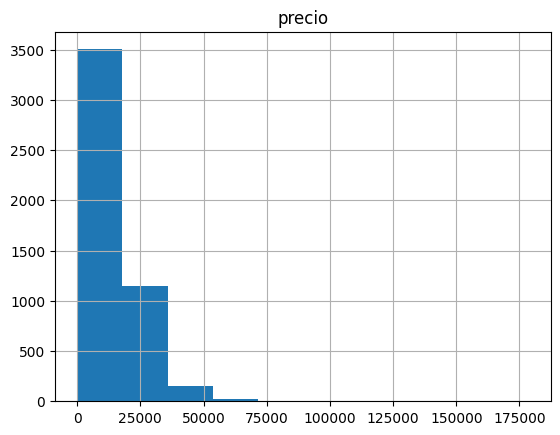

In [19]:
EDA_variables(df_bmw)

In [20]:
get_nulos(df_bmw)

columna  cant.nulos  % nulos
0   asientos_traseros_plegables        3391    70.02
1                fecha_registro        2423    50.03
2                    tipo_coche        1460    30.15
3                         marca         970    20.03
4          alerta_lim_velocidad         728    15.03
5                     bluetooth         728    15.03
6            aire_acondicionado         486    10.04
7                         color         445     9.19
8                        precio           6     0.12
9                 tipo_gasolina           5     0.10
10            volante_regulable           4     0.08
11                       modelo           3     0.06
12         elevalunas_electrico           2     0.04
13                           km           2     0.04
14               camara_trasera           2     0.04
15                     potencia           1     0.02
16                  fecha_venta           1     0.02
17                          gps           0     0.00

En la siguiente tabla se visualiza la cantidad de columnas con un valor nulo por cada uno de los registros, al igual del porcentaje de columnas nulas sobre el total de columnas (considerando 18 columnas).

Esto permite identificar aquellos registros donde gran parte de la información no está disponible.

In [21]:
df_nulos_fila = pd.DataFrame({
    'indice': df_bmw.index,
    'n_nulos': df_bmw.isnull().sum(axis=1).values,
    '%_nulos': (df_bmw.isnull().mean(axis=1).values * 100).round(2)
})
df_nulos_fila = df_nulos_fila.sort_values(by='%_nulos', ascending=False).reset_index(drop=True)
print(df_nulos_fila)

      indice  n_nulos  %_nulos
0         18        6    33.33
1       1131        6    33.33
2       1759        6    33.33
3       1043        6    33.33
4       2165        6    33.33
...      ...      ...      ...
4838    3550        0     0.00
4839    3505        0     0.00
4840    3519        0     0.00
4841     642        0     0.00
4842     612        0     0.00

[4843 rows x 3 columns]


In [22]:
cantidad_nulos = (df_bmw.isnull().sum(axis=1))

conteo_cantidad_nulos = cantidad_nulos.value_counts().sort_index()

print(conteo_cantidad_nulos)

0     238
1    1046
2    1736
3    1264
4     458
5      91
6      10
Name: count, dtype: int64


### **Eliminación de columnas por EDA**

#### Marca

En el **.head()** del EDA identificamos que **todas las marcas podrían ser BMW**. Valideremos esta hipótesis, y justificaremos la eliminación de la columna:

In [23]:
df_bmw_2 = df_bmw.copy()

In [24]:
# Primero revisamos si BMW es el unico valor introducido

df_bmw_2["marca"].drop_duplicates()

0    NaN
1    BMW
Name: marca, dtype: object

In [25]:
# Ahora crearemos un df con los valores unicos de modelo y marca

df_marca_modelo = df_bmw_2[["modelo", "marca"]].drop_duplicates().dropna()

df_marca_modelo

modelo marca
1                    M4   BMW
2                   320   BMW
3                   420   BMW
4                   425   BMW
5                   335   BMW
...                 ...   ...
4803                216   BMW
4808    216 Gran Tourer   BMW
4810  216 Active Tourer   BMW
4820      Active Tourer   BMW
4826    214 Gran Tourer   BMW

[72 rows x 2 columns]

In [26]:
# Ahora cruzaremos los nulos de marca, con el df marca_modelo

nulos_marca = df_bmw_2[df_bmw_2["marca"].isnull()]

nulos_marca["modelo"].isin(df_marca_modelo["modelo"]).value_counts()

modelo
True     964
False      6
Name: count, dtype: int64

In [27]:
# Como 964 de 970 modelos pertenecen a un valor de BMW, eliminaremos la variable marca ya que no aporta valor

df_bmw_2.drop(columns=["marca"], inplace=True)

#### GPS

En el análisis inicial de la distribución de valores únicos en la variable ***gps***, se identificó que no contaba con valores nulos y además que la cantidad de valores *gps = True considera el 93.2%* del total.

A pesar de que este valor es inferior a 95%, se ha evaluado que esta variable no es considerada tan relevante como para ser considerada en el modelo.

Siendo esta distribución muy elevada para esta respuesta teniendo muy poca variabilidad para que este campo sea considerado de valor en nuestro modelo, se opta por eliminar la columna ***gps***.

In [28]:
df_bmw_2['gps'].value_counts(normalize=True, dropna=False) * 100

gps
True     93.20669
False     6.79331
Name: proportion, dtype: float64

In [29]:
df_bmw_2.drop(columns=['gps'], inplace=True)

#### Tipo Gasolina

En el análisis inicial de la distribución de valores únicos en la variable ***tipo_gasolina***, se identificó que la concentración de datos se enfoca en el valor *diesel con 95.8%*. Siendo esta distribución muy elevada para esta respuesta teniendo muy poca variabilidad para que este campo sea considerado de valor en nuestro modelo, se opta por eliminar la columna ***tipo_gasolina***.

In [30]:
df_bmw_2['tipo_gasolina'].value_counts(normalize=True, dropna=False) * 100

tipo_gasolina
diesel           95.622548
petrol            3.943836
hybrid_petrol     0.165187
NaN               0.103242
Diesel            0.103242
electro           0.061945
Name: proportion, dtype: float64

In [31]:
df_bmw_2.drop(columns=['tipo_gasolina'], inplace=True)

## **0.1 Tratamiento de duplicados**

In [32]:
df_bmw_2[df_bmw_2.duplicated(keep=False)].sum()

modelo                           0
km                             0.0
potencia                       0.0
fecha_registro                   0
color                            0
tipo_coche                       0
volante_regulable                0
aire_acondicionado               0
camara_trasera                   0
asientos_traseros_plegables      0
elevalunas_electrico             0
bluetooth                        0
alerta_lim_velocidad             0
precio                         0.0
fecha_venta                      0
dtype: object

Observamos que no existe **ningún duplicado** en todo el dataframe, por tanto continuamos con el análisis e imputación de nulos.

## **0.2 Tratamiento de nulos**

In [33]:
get_nulos(df_bmw_2)

columna  cant.nulos  % nulos
0   asientos_traseros_plegables        3391    70.02
1                fecha_registro        2423    50.03
2                    tipo_coche        1460    30.15
3                     bluetooth         728    15.03
4          alerta_lim_velocidad         728    15.03
5            aire_acondicionado         486    10.04
6                         color         445     9.19
7                        precio           6     0.12
8             volante_regulable           4     0.08
9                        modelo           3     0.06
10                           km           2     0.04
11         elevalunas_electrico           2     0.04
12               camara_trasera           2     0.04
13                     potencia           1     0.02
14                  fecha_venta           1     0.02

In [34]:
# Realizamos una copia para empezar a imputar los nulos
df_bmw_3 = df_bmw_2.copy()

### **Variable con nulos <1%**

Hay algunas **variables** con una un **porcentaje de nulos por debajo del 1%** del total del dataframe. **Se procede a la  eliminación directa de dichos registros** al calcular que ellos suponen una afectación mínima en la distribución (*menor a 0,42%*) y en el modelo posteriormente.

In [35]:
COLUMNS = []
for column in df_bmw_3.columns:
  if (df_bmw_3[column].isnull().mean())*100 <1:
    COLUMNS.append(column)


In [36]:
COLUMNS

['modelo',
 'km',
 'potencia',
 'volante_regulable',
 'camara_trasera',
 'elevalunas_electrico',
 'precio',
 'fecha_venta']

In [37]:
df_bmw_3.dropna(subset = COLUMNS, how= 'any', inplace = True)

In [38]:
get_nulos(df_bmw_3)

columna  cant.nulos  % nulos
0   asientos_traseros_plegables        3377    70.03
1                fecha_registro        2411    50.00
2                    tipo_coche        1451    30.09
3                     bluetooth         725    15.04
4          alerta_lim_velocidad         725    15.04
5            aire_acondicionado         483    10.02
6                         color         442     9.17
7             volante_regulable           0     0.00
8                        modelo           0     0.00
9                            km           0     0.00
10                     potencia           0     0.00
11         elevalunas_electrico           0     0.00
12               camara_trasera           0     0.00
13                       precio           0     0.00
14                  fecha_venta           0     0.00

In [39]:
# Realizamos una copia por cada imputación.
df_bmw_4 = df_bmw_3.copy()

### **asientos_traseros_plegables**

In [40]:
df_bmw_4['asientos_traseros_plegables'].value_counts(normalize= True, dropna = False)*100

asientos_traseros_plegables
NaN      70.033181
False    23.724596
True      6.242223
Name: proportion, dtype: float64

In [41]:
# revisamos si podemos encontrar una logica entre el tipo de coche y los asientos, pero no encontramos ninguna relación relevante.

df_bmw_4.groupby(["tipo_coche","asientos_traseros_plegables"]).size()

tipo_coche   asientos_traseros_plegables
convertible  False                            9
coupe        False                           21
             True                             3
estate       False                          287
             True                            37
hatchback    False                          129
             True                             7
sedan        False                          215
             True                            26
subcompact   False                           28
suv          False                           90
             True                           128
van          False                            7
dtype: int64

Los **nulos** en esta variable representan el **70%**, al ser un porcentaje muy elevado de valores no conocidos el riesgo de imputación de valores que no corresponden es muy elevado por lo cual se considera optar la alternativa de prescindir de esta columna para el análisis del modelo.

In [42]:
df_bmw_4.drop(columns=['asientos_traseros_plegables'], inplace=True)

In [43]:
get_nulos(df_bmw_4)

columna  cant.nulos  % nulos
0         fecha_registro        2411    50.00
1             tipo_coche        1451    30.09
2              bluetooth         725    15.04
3   alerta_lim_velocidad         725    15.04
4     aire_acondicionado         483    10.02
5                  color         442     9.17
6               potencia           0     0.00
7                     km           0     0.00
8                 modelo           0     0.00
9      volante_regulable           0     0.00
10  elevalunas_electrico           0     0.00
11        camara_trasera           0     0.00
12                precio           0     0.00
13           fecha_venta           0     0.00

### **EXPLICACIÓN: Tratamiento de nulos por imputación jerárquica**

A partir de ahora **imputaremos los valores nulos por estrategia jerárquica**, a partir de agrupaciónes de variables, ya sea por agrupación de dos o  mas variables.

La **estratégia jerárquica** se utiliza para **hacer imputaciones más precisas** (agrupando más variables) **a menos** (agrupación de menos variables), llegando a imputar por una variable más genérica en última instancia.

Creamos **dos funciones** para la imputación jerárquica:

- Una **imputa** los valores nulos **por el método que tu le indiques** (moda, media, mediana, etc.)

- Otra **imputa** por un **muestreo aleatorio**, cogiendo un valor al azar de cada agrupación de variables.

**Esta última** se utiliza para **mantener la distribución inicial de las variables** cuando el método imputado distorsiona demasiado la distribución.

En todas las variables se prueban las dos funciones y seleccionamos la que menos distorsiona la distribución inicial.

In [44]:
# IMPUTACIÓN JERÁRQUICA POR MÉTODO
#------------------------------------------------

#Lo que hace esta función:

# - Crea una copia del dataframe.
# - Crea lista con las columnas que queremos agrupar.
# - Agrupa por columnas y a la variable dependiente le imputa el método elegido, si el valor está vacío le imputa nan. Hace un dataframe.
# - Del dataframe, elimina los nulos de la variable dependiente.
# - Renombra la variable dependiente.
# - Realiza un join left del dataframe original con los dataframes generados.
# - con la función bfill() rellenamos las filas vacias de la columna original con las columanas generadas.
# - Elimina el resto de columnas generadas.

# Imprime recuento de nulos
# devuelve el dataframe final con los valores imputados.

def imputar_jerarquica_metodo(dataframe, columna_objetivo,  lista_columnas_grupo, metodo):

  if len(lista_columnas_grupo) < 1:
        raise ValueError("La lista de columnas de agrupación debe tener al menos una columna.")

  df= dataframe.copy()
  columnas_generadas = []
  num_nulos_iniciales = df[columna_objetivo].isnull().sum()
  print(f'Nulos iniciales= {num_nulos_iniciales}')

  COLUMNS_1 = lista_columnas_grupo[:]
  df_nulls_1 = df.groupby(COLUMNS_1)[columna_objetivo].agg(lambda x: getattr(x, metodo)().iloc[0] if not getattr(x, metodo)().empty else np.nan).to_frame().reset_index()
  df_nulls_1 = df_nulls_1.dropna(subset=[columna_objetivo])
  df_nulls_1.rename(columns={columna_objetivo:columna_objetivo + '_1'},inplace=True)
  col_1= columna_objetivo + '_1'
  columnas_generadas.append(col_1)

  COLUMNS_2 = lista_columnas_grupo[:-1]
  df_nulls_2 = df.groupby(COLUMNS_2)[columna_objetivo].agg(lambda x: getattr(x, metodo)().iloc[0] if not getattr(x, metodo)().empty else np.nan).to_frame().reset_index()
  df_nulls_2 = df_nulls_2.dropna(subset=[columna_objetivo])
  df_nulls_2.rename(columns={columna_objetivo:columna_objetivo + '_2'},inplace=True)
  col_2= columna_objetivo + '_2'
  columnas_generadas.append(col_2)

  COLUMNS_3 = [lista_columnas_grupo[i] for i in [0, 2]]
  df_nulls_3 = df.groupby(COLUMNS_3)[columna_objetivo].agg(lambda x: getattr(x, metodo)().iloc[0] if not getattr(x, metodo)().empty else np.nan).to_frame().reset_index()
  df_nulls_3 = df_nulls_3.dropna(subset=[columna_objetivo])
  df_nulls_3.rename(columns={columna_objetivo:columna_objetivo + '_3'},inplace=True)
  col_3= columna_objetivo + '_3'
  columnas_generadas.append(col_3)

  COLUMNS_4 =lista_columnas_grupo[:-2]
  df_nulls_4 = df.groupby(COLUMNS_4)[columna_objetivo].agg(lambda x: getattr(x, metodo)().iloc[0] if not getattr(x, metodo)().empty else np.nan).to_frame().reset_index()
  df_nulls_4 = df_nulls_4.dropna(subset=[columna_objetivo])
  df_nulls_4.rename(columns={columna_objetivo:columna_objetivo + '_4'},inplace=True)
  col_4= columna_objetivo + '_4'
  columnas_generadas.append(col_4)

  df = df.merge(df_nulls_1, how='left', left_on= COLUMNS_1, right_on=COLUMNS_1)
  df = df.merge(df_nulls_2, how='left', left_on= COLUMNS_2, right_on=COLUMNS_2)
  df = df.merge(df_nulls_3, how='left', left_on= COLUMNS_3, right_on=COLUMNS_3)
  df = df.merge(df_nulls_4, how='left', left_on= COLUMNS_4, right_on=COLUMNS_4)
  # Calculo de imputaciones por fase
  nulos_a_imputar = df[columna_objetivo].isnull()
  # Fase 1
  imputados_1 = df.loc[nulos_a_imputar, col_1].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_1} = {imputados_1}')

  # Fase 2: solo miramos los que no fueron imputados en fase 1
  nulos_fase_2= nulos_a_imputar & df[col_1].isnull()
  imputados_2 = df.loc[nulos_fase_2, col_2].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_2} = {imputados_2}')

  # Fase 3: solo los que no se imputaron en 1 ni 2
  nulos_fase_3 = nulos_fase_2 & df[col_2].isnull()
  imputados_3 = df.loc[nulos_fase_3, col_3].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_3} = {imputados_3}')

  # Fase 4: solo los que no se imputaron en 1 ni 2 ni 3
  nulos_fase_4 = nulos_fase_3 & df[col_3].isnull()
  imputados_4 = df.loc[nulos_fase_4, col_4].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_4} = {imputados_4}')


  # imputación de los valores
  df[columna_objetivo]= df[[columna_objetivo,columna_objetivo, col_1, col_2, col_3,col_4 ]].bfill(axis=1).iloc[:,0]
  df.drop(columns=columnas_generadas,inplace=True)

  # Recuento final después de imputación
  nulos_finales = df[columna_objetivo].isnull().sum()
  nulos_imputados_totales = num_nulos_iniciales - nulos_finales

  print(f'Nulos totales imputados = {nulos_imputados_totales}')
  print(f'Nulos no imputados = {nulos_finales}')

  return df

In [45]:
# IMPUTACIÓN JERÁRQUICA POR MUESTREO ALEATORIO
#------------------------------------------------

#Lo que hace esta función:

# - Crea una copia del dataframe.
# - Crea lista con las columnas que queremos agrupar.
# - Agrupa por columnas y a la variable dependiente le imputa un valor al azar de ese grupo, si el valor esta vacío le imputa nan. Hace un dataframe.
# - Del dataframe, elimina esos nulos de la variable dependiente.
# - Renombra la variable dependiente.
# - Realiza un join left del dataframe original con los dataframes generados.
# - con la función bfill() rellenamos las filas vacías de la columna original con las columanas generadas.
# - Elimina el resto de columnas generadas.

# Imprime recuento de nulos
# devuelve el dataframe final con los valores imputados.

def imputar_jerarquica_muestreo_aleatorio(dataframe, columna_objetivo,  lista_columnas_grupo):

  if len(lista_columnas_grupo) < 1:
        raise ValueError("La lista de columnas de agrupación debe tener al menos una columna.")

  df= dataframe.copy()
  columnas_generadas = []
  num_nulos_iniciales = df[columna_objetivo].isnull().sum()
  print(f'Nulos iniciales= {num_nulos_iniciales}')

  COLUMNS_1 = lista_columnas_grupo[:]
  df_nulls_1 = df.groupby(COLUMNS_1)[columna_objetivo].agg(lambda x: x.dropna().sample(1).iloc[0] if not x.dropna().empty else np.nan).to_frame().reset_index()
  df_nulls_1 = df_nulls_1.dropna(subset=[columna_objetivo])
  df_nulls_1.rename(columns={columna_objetivo:columna_objetivo + '_1'},inplace=True)
  col_1= columna_objetivo + '_1'
  columnas_generadas.append(col_1)

  COLUMNS_2 = lista_columnas_grupo[:-1]
  df_nulls_2 = df.groupby(COLUMNS_2)[columna_objetivo].agg(lambda x: x.dropna().sample(1).iloc[0] if not x.dropna().empty else np.nan).to_frame().reset_index()
  df_nulls_2 = df_nulls_2.dropna(subset=[columna_objetivo])
  df_nulls_2.rename(columns={columna_objetivo:columna_objetivo + '_2'},inplace=True)
  col_2= columna_objetivo + '_2'
  columnas_generadas.append(col_2)

  COLUMNS_3 = [lista_columnas_grupo[i] for i in [0, 2]]
  df_nulls_3 = df.groupby(COLUMNS_3)[columna_objetivo].agg(lambda x: x.dropna().sample(1).iloc[0] if not x.dropna().empty else np.nan).to_frame().reset_index()
  df_nulls_3 = df_nulls_3.dropna(subset=[columna_objetivo])
  df_nulls_3.rename(columns={columna_objetivo:columna_objetivo + '_3'},inplace=True)
  col_3= columna_objetivo + '_3'
  columnas_generadas.append(col_3)

  COLUMNS_4 =lista_columnas_grupo[:-2]
  df_nulls_4 = df.groupby(COLUMNS_4)[columna_objetivo].agg(lambda x: x.dropna().sample(1).iloc[0] if not x.dropna().empty else np.nan).to_frame().reset_index()
  df_nulls_4 = df_nulls_4.dropna(subset=[columna_objetivo])
  df_nulls_4.rename(columns={columna_objetivo:columna_objetivo + '_4'},inplace=True)
  col_4= columna_objetivo + '_4'
  columnas_generadas.append(col_4)

  df = df.merge(df_nulls_1, how='left', left_on= COLUMNS_1, right_on=COLUMNS_1)
  df = df.merge(df_nulls_2, how='left', left_on= COLUMNS_2, right_on=COLUMNS_2)
  df = df.merge(df_nulls_3, how='left', left_on= COLUMNS_3, right_on=COLUMNS_3)
  df = df.merge(df_nulls_4, how='left', left_on= COLUMNS_4, right_on=COLUMNS_4)
  # Calculo de imputaciones por fase
  nulos_a_imputar = df[columna_objetivo].isnull()
  # Fase 1
  imputados_1 = df.loc[nulos_a_imputar, col_1].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_1} = {imputados_1}')

  # Fase 2: solo miramos los que no fueron imputados en fase 1
  nulos_fase_2= nulos_a_imputar & df[col_1].isnull()
  imputados_2 = df.loc[nulos_fase_2, col_2].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_2} = {imputados_2}')

  # Fase 3: solo los que no se imputaron en 1 ni 2
  nulos_fase_3 = nulos_fase_2 & df[col_2].isnull()
  imputados_3 = df.loc[nulos_fase_3, col_3].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_3} = {imputados_3}')

  # Fase 4: solo los que no se imputaron en 1 ni 2 ni 3
  nulos_fase_4 = nulos_fase_3 & df[col_3].isnull()
  imputados_4 = df.loc[nulos_fase_4, col_4].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_4} = {imputados_4}')


  # imputación de los valores
  df[columna_objetivo]= df[[columna_objetivo,columna_objetivo, col_1, col_2, col_3,col_4 ]].bfill(axis=1).iloc[:,0]
  df.drop(columns=columnas_generadas,inplace=True)

  # Recuento final después de imputación
  nulos_finales = df[columna_objetivo].isnull().sum()
  nulos_imputados_totales = num_nulos_iniciales - nulos_finales

  print(f'Nulos totales imputados = {nulos_imputados_totales}')
  print(f'Nulos no imputados = {nulos_finales}')

  return df

### **Tipo_coche**

Haremos un análisis preliminar de la variable **'tipo_coche'**.

In [46]:
## Este codigo me permite visualizar todo el value counts que utilizaremos en el siguiente paso
pd.set_option('display.max_rows', None)

In [47]:
df_bmw_4['tipo_coche'].value_counts(normalize=True)*100

tipo_coche
estate         32.631267
sedan          24.354791
suv            22.367250
hatchback      14.476416
subcompact      2.284189
coupe           2.165530
convertible     0.889944
van             0.830614
Name: proportion, dtype: float64

A continuación, se agrupan los coches por ***modelo*** y por ***tipo de coche*** para poder identificar si de manera porcentual existe algún tipo de coche predominante para modelos específicos.

In [48]:
df_bmw_4.groupby('modelo')['tipo_coche'].value_counts(normalize=True)

modelo             tipo_coche 
 Active Tourer     van            1.000000
114                hatchback      0.600000
                   subcompact     0.400000
116                hatchback      0.757937
                   subcompact     0.222222
                   sedan          0.011905
                   estate         0.007937
118                hatchback      0.806122
                   subcompact     0.132653
                   sedan          0.030612
                   coupe          0.020408
                   convertible    0.010204
120                hatchback      0.695652
                   convertible    0.173913
                   subcompact     0.086957
                   sedan          0.043478
123                hatchback      1.000000
125                hatchback      1.000000
135                hatchback      0.500000
                   convertible    0.250000
                   coupe          0.250000
214 Gran Tourer    van            1.000000
216                van            1.000000
216 Active Tourer  van            1.000000
216 Gran Tourer    van            1.000000
218                convertible    0.428571
                   coupe          0.285714
                   van            0.285714
218 Active Tourer  van            1.000000
218 Gran Tourer    van            1.000000
220                convertible    0.500000
                   coupe          0.500000
220 Active Tourer  van            1.000000
225                coupe          1.000000
225 Active Tourer  van            1.000000
316                sedan          0.518293
                   estate         0.469512
                   coupe          0.006098
                   hatchback      0.006098
318                estate         0.701031
                   sedan          0.283505
                   convertible    0.007732
                   subcompact     0.005155
                   hatchback      0.002577
318 Gran Turismo   hatchback      0.859375
                   sedan          0.140625
320                estate         0.589942
                   sedan          0.346228
                   hatchback      0.032882
                   coupe          0.023211
                   convertible    0.007737
320 Gran Turismo   hatchback      0.730769
                   sedan          0.250000
                   van            0.019231
325                estate         0.500000
                   sedan          0.250000
                   coupe          0.166667
                   convertible    0.083333
325 Gran Turismo   hatchback      0.750000
                   estate         0.250000
328                estate         0.750000
                   sedan          0.250000
330                estate         0.666667
                   sedan          0.222222
                   coupe          0.074074
                   convertible    0.037037
330 Gran Turismo   hatchback      1.000000
335                coupe          0.400000
                   sedan          0.400000
                   estate         0.200000
335 Gran Turismo   hatchback      1.000000
418 Gran Coupé     hatchback      1.000000
420                coupe          0.806452
                   convertible    0.129032
                   hatchback      0.032258
                   sedan          0.032258
420 Gran Coupé     hatchback      0.857143
                   sedan          0.142857
425                coupe          1.000000
430                coupe          1.000000
430 Gran Coupé     hatchback      0.666667
                   coupe          0.333333
435                coupe          1.000000
435 Gran Coupé     hatchback      0.500000
                   coupe          0.250000
                   sedan          0.250000
518                sedan          0.533333
                   estate         0.466667
520                estate         0.533333
                   sedan          0.452874
                   hatchback      0.011494
                   suv            0.002299
520 Gran Turi

Queremos confirmar que la combinación entre "modelo" y "potencia" nos permite hacer una inputación fiable.

In [49]:
## Identificamos que la mayoría de las combinaciones retornan un solo tipo_coche.
## Lo cual confirma que la moda es la mejor opción para inputar

df_bmw_4.groupby(['modelo','potencia'])['tipo_coche'].value_counts(normalize=True)

modelo             potencia  tipo_coche 
 Active Tourer     100.0     van            1.000000
114                70.0      subcompact     0.571429
                             hatchback      0.428571
                   75.0      hatchback      1.000000
116                80.0      hatchback      0.500000
                             estate         0.250000
                             subcompact     0.250000
                   85.0      hatchback      0.755187
                             subcompact     0.228216
                             sedan          0.012448
                             estate         0.004149
                   87.0      hatchback      1.000000
                   90.0      hatchback      1.000000
                   100.0     hatchback      1.000000
                   101.0     hatchback      1.000000
                   105.0     hatchback      1.000000
118                90.0      hatchback      0.727273
                             subcompact     0.272727
                   95.0      subcompact     1.000000
                   100.0     hatchback      0.800000
                             subcompact     0.150000
                             coupe          0.050000
                   105.0     hatchback      0.787234
                             subcompact     0.106383
                             sedan          0.063830
                             convertible    0.021277
                             coupe          0.021277
                   110.0     hatchback      1.000000
                   125.0     subcompact     1.000000
                   127.0     hatchback      1.000000
120                110.0     hatchback      1.000000
                   120.0     convertible    0.666667
                             subcompact     0.333333
                   130.0     convertible    0.500000
                             hatchback      0.500000
                   135.0     hatchback      0.846154
                             sedan          0.076923
                             subcompact     0.076923
                   140.0     hatchback      1.000000
123                150.0     hatchback      1.000000
125                155.0     hatchback      1.000000
                   160.0     hatchback      1.000000
135                225.0     convertible    0.500000
                             coupe          0.500000
                   235.0     hatchback      1.000000
214 Gran Tourer    70.0      van            1.000000
216                85.0      van            1.000000
216 Active Tourer  85.0      van            1.000000
216 Gran Tourer    85.0      van            1.000000
218                100.0     convertible    0.666667
                             coupe          0.333333
                   105.0     coupe          1.000000
                   110.0     van            0.666667
                             convertible    0.333333
218 Active Tourer  100.0     van            1.000000
                   110.0     van            1.000000
                   112.0     van            1.000000
218 Gran Tourer    100.0     van            1.000000
                   110.0     van            1.000000
220                135.0     convertible    1.000000
                   140.0     coupe          1.000000
220 Active Tourer  140.0     van            1.000000
225                160.0     coupe          1.000000
225 Active Tourer  170.0     van            1.000000
316                66.0      sedan          1.000000
                   75.0      sedan          1.000000
                   77.0      sedan          1.000000
                   85.0      sedan          0.496815
                             estate         0.490446
                             coupe          0.006369
                             hatchback      0.006369
                   87.0      sedan          1.000000
318                66.0      hatchback      1.000000
                   85.0      sedan          0.375000
                             estate  

Utilizaremos una **imputación jerárquica por el método (moda)**, ya que vemos que en la mayoría de las variables tienen un valor único (o uno predominante) por agrupación.

 **En este caso, módificamos la función inicial creada**, por que ahora solo imputaremos dos valores, en lugar de tres.

In [50]:
# IMPUTACIÓN JERÁRQUICA POR MÉTODO
#------------------------------------------------

#Lo que hace esta función:

# - Crea una copia del dataframe.
# - Crea lista con las columnas que queremos agrupar.
# - Agrupa por columnas y a la variable dependiente le imputa el método elegido, si el valor esta vacío le imputa nan. Hace un dataframe.
# - Del dataframe, elimina esos nulos de la variable dependiente.
# - Renombra la variable dependiente.
# - Realiza un join left del dataframe original con los dataframes generados.
# - con la función bfill() rellenamos las filas vacías de la columna original con las columanas generadas.
# - Elimina el resto de columnas generadas.

# Imprime recuento de nulos
# devuelve el dataframe final con los valores imputados.

def imputar_jerarquica_metodo_2v(dataframe, columna_objetivo,  lista_columnas_grupo, metodo):

  if len(lista_columnas_grupo) < 1:
        raise ValueError("La lista de columnas de agrupación debe tener al menos una columna.")

  df= dataframe.copy()
  columnas_generadas = []
  num_nulos_iniciales = df[columna_objetivo].isnull().sum()
  print(f'Nulos iniciales= {num_nulos_iniciales}')

  COLUMNS_1 = lista_columnas_grupo[:]
  df_nulls_1 = df.groupby(COLUMNS_1)[columna_objetivo].agg(lambda x: getattr(x, metodo)().iloc[0] if not getattr(x, metodo)().empty else np.nan).to_frame().reset_index()
  df_nulls_1 = df_nulls_1.dropna(subset=[columna_objetivo])
  df_nulls_1.rename(columns={columna_objetivo:columna_objetivo + '_1'},inplace=True)
  col_1= columna_objetivo + '_1'
  columnas_generadas.append(col_1)

  COLUMNS_2 = lista_columnas_grupo[:-1]
  df_nulls_2 = df.groupby(COLUMNS_2)[columna_objetivo].agg(lambda x: getattr(x, metodo)().iloc[0] if not getattr(x, metodo)().empty else np.nan).to_frame().reset_index()
  df_nulls_2 = df_nulls_2.dropna(subset=[columna_objetivo])
  df_nulls_2.rename(columns={columna_objetivo:columna_objetivo + '_2'},inplace=True)
  col_2= columna_objetivo + '_2'
  columnas_generadas.append(col_2)


  df = df.merge(df_nulls_1, how='left', left_on= COLUMNS_1, right_on=COLUMNS_1)
  df = df.merge(df_nulls_2, how='left', left_on= COLUMNS_2, right_on=COLUMNS_2)
  # Calculo de imputaciones por fase
  nulos_a_imputar = df[columna_objetivo].isnull()
  # Fase 1
  imputados_1 = df.loc[nulos_a_imputar, col_1].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_1} = {imputados_1}')

  # Fase 2: solo miramos los que no fueron imputados en fase 1
  nulos_fase_2= nulos_a_imputar & df[col_1].isnull()
  imputados_2 = df.loc[nulos_fase_2, col_2].notnull().sum()
  print(f'Nulos imputados con grupo {COLUMNS_2} = {imputados_2}')

  # imputación de los valores
  df[columna_objetivo]= df[[columna_objetivo,columna_objetivo, col_1, col_2]].bfill(axis=1).iloc[:,0]
  df.drop(columns=columnas_generadas,inplace=True)

  # Recuento final después de imputación
  nulos_finales = df[columna_objetivo].isnull().sum()
  nulos_imputados_totales = num_nulos_iniciales - nulos_finales

  print(f'Nulos totales imputados = {nulos_imputados_totales}')
  print(f'Nulos no imputados = {nulos_finales}')

  return df

In [51]:
df_bmw_5 = imputar_jerarquica_metodo_2v(df_bmw_4, 'tipo_coche', ['modelo', 'potencia'], 'mode')

Nulos iniciales= 1451
Nulos imputados con grupo ['modelo', 'potencia'] = 1432
Nulos imputados con grupo ['modelo'] = 19
Nulos totales imputados = 1451
Nulos no imputados = 0


Comprobamos la distribución pre-imputación y post-imputación.

In [52]:
df_bmw_4['tipo_coche'].value_counts(normalize= True)

tipo_coche
estate         0.326313
sedan          0.243548
suv            0.223673
hatchback      0.144764
subcompact     0.022842
coupe          0.021655
convertible    0.008899
van            0.008306
Name: proportion, dtype: float64

In [53]:
df_bmw_5['tipo_coche'].value_counts(normalize= True)

tipo_coche
estate         0.356906
suv            0.219618
sedan          0.216715
hatchback      0.152841
coupe          0.020324
subcompact     0.017005
van            0.008503
convertible    0.008088
Name: proportion, dtype: float64

Tras la imputación vemos que las categorias **'estate' y 'sedan'** han sufrido una variación **por encima del 2.5%**, espcialmente 'estate' llegando al **3.0%**. El **resto de variables** mantienen una variación **por debajo del 1%**. Puesto que se trata de una variable descriptiva, el cambio se considera aceptable, aunque pueda inducir a leves sesgos en el modelo. Se asume la responsabilidad.

### **fecha_registro**

In [54]:
get_nulos(df_bmw_5)

columna  cant.nulos  % nulos
0         fecha_registro        2411    50.00
1   alerta_lim_velocidad         725    15.04
2              bluetooth         725    15.04
3     aire_acondicionado         483    10.02
4                  color         442     9.17
5                     km           0     0.00
6             tipo_coche           0     0.00
7               potencia           0     0.00
8                 modelo           0     0.00
9      volante_regulable           0     0.00
10  elevalunas_electrico           0     0.00
11        camara_trasera           0     0.00
12                precio           0     0.00
13           fecha_venta           0     0.00

Para imputar la variable **'fecha_registro'**, decidimos crear nuevas variables que aportan información mas significativa y simplificada para el modelo final. Y nos quedaremos con la variable **'antigüedad'** que nos aporta la información de interés. Esta última será a la que imputaremos los valores nulos.

In [55]:
df_bmw_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4822 non-null   object 
 1   km                    4822 non-null   float64
 2   potencia              4822 non-null   float64
 3   fecha_registro        2411 non-null   object 
 4   color                 4380 non-null   object 
 5   tipo_coche            4822 non-null   object 
 6   volante_regulable     4822 non-null   object 
 7   aire_acondicionado    4339 non-null   object 
 8   camara_trasera        4822 non-null   object 
 9   elevalunas_electrico  4822 non-null   object 
 10  bluetooth             4097 non-null   object 
 11  alerta_lim_velocidad  4097 non-null   object 
 12  precio                4822 non-null   float64
 13  fecha_venta           4822 non-null   object 
dtypes: float64(3), object(11)
memory usage: 527.5+ KB


In [56]:
#Convertimos las variables de fechas a tipo datetime
COLUMNS = ['fecha_registro','fecha_venta']
for  column in df_bmw_5.columns:
  if column in COLUMNS:
    df_bmw_5[column] =  pd.to_datetime(df_bmw_5[column])

In [57]:
# Creamos nuevas variables ('año_registro, 'año_venta', 'mes_venta', 'antigüedad'), considerando antigüedad como la diferencia en años entre
# el año de registro del coche y el año de venta.
df_bmw_5['año_registro'] = df_bmw_5['fecha_registro'].dt.year
df_bmw_5['año_venta'] = df_bmw_5['fecha_venta'].dt.year
df_bmw_5['mes_venta'] = df_bmw_5['fecha_venta'].dt.month
df_bmw_5['antigüedad']=  df_bmw_5['año_venta']- df_bmw_5['año_registro']

In [58]:
df_bmw_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4822 non-null   object        
 1   km                    4822 non-null   float64       
 2   potencia              4822 non-null   float64       
 3   fecha_registro        2411 non-null   datetime64[ns]
 4   color                 4380 non-null   object        
 5   tipo_coche            4822 non-null   object        
 6   volante_regulable     4822 non-null   object        
 7   aire_acondicionado    4339 non-null   object        
 8   camara_trasera        4822 non-null   object        
 9   elevalunas_electrico  4822 non-null   object        
 10  bluetooth             4097 non-null   object        
 11  alerta_lim_velocidad  4097 non-null   object        
 12  precio                4822 non-null   float64       
 13  fecha_venta       

In [59]:
pd.set_option('display.max_rows', 20)

**Eliminamos** las variables **'fecha_registro', 'fecha_venta' , 'año_registro'**, ya que con las nuevas variables generadas **['antigüedad', 'año_venta', 'mes_venta']** tenemos la información relevante para el modelo.

In [60]:
df_bmw_5.drop( columns=['fecha_registro', 'fecha_venta' , 'año_registro'], inplace = True)

In [61]:
get_nulos(df_bmw_5)

columna  cant.nulos  % nulos
0             antigüedad        2411    50.00
1   alerta_lim_velocidad         725    15.04
2              bluetooth         725    15.04
3     aire_acondicionado         483    10.02
4                  color         442     9.17
5               potencia           0     0.00
6                 modelo           0     0.00
7      volante_regulable           0     0.00
8             tipo_coche           0     0.00
9                     km           0     0.00
10  elevalunas_electrico           0     0.00
11        camara_trasera           0     0.00
12                precio           0     0.00
13             año_venta           0     0.00
14             mes_venta           0     0.00

In [62]:
pd.set_option('display.max_rows', None)

In [63]:
df_bmw_5['antigüedad'].value_counts(normalize=True).sort_index()*100

antigüedad
-5.0      0.041477
-1.0      0.041477
 1.0      0.207383
 2.0      1.907922
 3.0      6.719204
 4.0     26.254666
 5.0     31.273331
 6.0     17.959353
 7.0      4.769805
 8.0      2.115305
 9.0      1.617586
 10.0     1.742016
 11.0     1.202820
 12.0     1.202820
 13.0     1.161344
 14.0     0.414766
 15.0     0.331813
 16.0     0.165906
 17.0     0.331813
 18.0     0.124430
 19.0     0.124430
 21.0     0.165906
 23.0     0.041477
 24.0     0.041477
 28.0     0.041477
Name: proportion, dtype: float64

Vemos que tenemos **valores de antigüedad negativos**. Procedemos a eliminarlos ya que se tratan de valores incorrectos.

In [64]:

indexes= df_bmw_5[df_bmw_5['antigüedad']<0].index
df_bmw_5 = df_bmw_5[~df_bmw_5.index.isin(indexes)]

In [65]:
df_bmw_5['antigüedad'].value_counts(normalize=True).sort_index()*100

antigüedad
1.0      0.207555
2.0      1.909506
3.0      6.724782
4.0     26.276463
5.0     31.299294
6.0     17.974263
7.0      4.773765
8.0      2.117061
9.0      1.618929
10.0     1.743462
11.0     1.203819
12.0     1.203819
13.0     1.162308
14.0     0.415110
15.0     0.332088
16.0     0.166044
17.0     0.332088
18.0     0.124533
19.0     0.124533
21.0     0.166044
23.0     0.041511
24.0     0.041511
28.0     0.041511
Name: proportion, dtype: float64

In [66]:
# Comprobamos estadísticos de la variable(min, max, mean, etc)
df_bmw_5['antigüedad'].describe()

count    2409.000000
mean        5.491075
std         2.500503
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        28.000000
Name: antigüedad, dtype: float64

Creemos que la variable **'km'** puede tener relación con la variable 'antigüedad' y **puede ser de interés para imputar los valores nulos**.

Como es una variable con muchos valores únicos con una gran dispersión, creamos la variable **'rango_km'**, donde **agrupamos los km por determinados rangos**, para posteriormente evaluar la distribución de estos nuevos valores asignados respecto al total.

In [67]:
df_bmw_5["km_rango"] = pd.cut(
    df_bmw_5["km"],
    bins=[-1, 10000, 30000, 60000, 100000, 150000, np.inf],
    labels=["0-10k", "10k-30k", "30k-60k", "60k-100k", "100k-150k", "+150k"])

In [68]:
df_bmw_5['km_rango'].value_counts(normalize= True, dropna= False)

km_rango
+150k        0.435685
100k-150k    0.329046
60k-100k     0.150622
30k-60k      0.060373
10k-30k      0.021369
0-10k        0.002697
NaN          0.000207
Name: proportion, dtype: float64

In [69]:
# Visualizamos cual es el valor nulo de la nueva variable.
# Es un valor que no se modificó por que no entraba en los rangos indicados por ser negativo.

df_bmw_5[df_bmw_5['km_rango'].isnull()]

modelo    km  potencia  color tipo_coche volante_regulable  \
2920  640 Gran Coupé -64.0     230.0  black      sedan              True   

     aire_acondicionado camara_trasera elevalunas_electrico bluetooth  \
2920               True          False                False     False   

     alerta_lim_velocidad   precio  año_venta  mes_venta  antigüedad km_rango  
2920                 True  75000.0       2018          4         NaN      NaN

In [70]:
# procedemos a eliminarlo.
df_bmw_5.dropna(subset =['km_rango'], inplace = True )

In [71]:
get_nulos(df_bmw_5)

columna  cant.nulos  % nulos
0             antigüedad        2410    50.01
1              bluetooth         725    15.04
2   alerta_lim_velocidad         724    15.02
3     aire_acondicionado         482    10.00
4                  color         442     9.17
5               potencia           0     0.00
6                     km           0     0.00
7                 modelo           0     0.00
8         camara_trasera           0     0.00
9      volante_regulable           0     0.00
10            tipo_coche           0     0.00
11  elevalunas_electrico           0     0.00
12                precio           0     0.00
13             año_venta           0     0.00
14             mes_venta           0     0.00
15              km_rango           0     0.00

<Axes: xlabel='antigüedad', ylabel='km'>

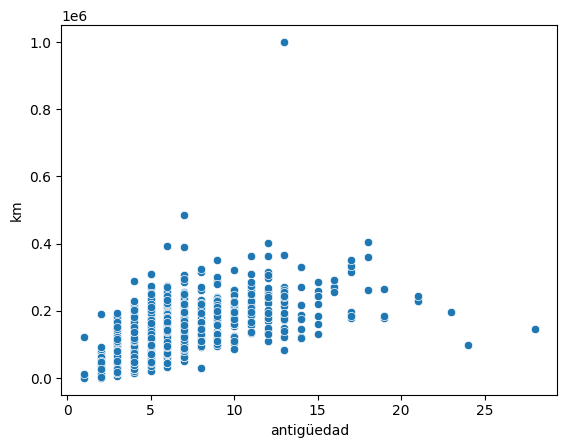

In [72]:
#Visualizamos la relación de las variables.
sns.scatterplot(data = df_bmw_5, x = 'antigüedad', y= 'km')

**Estudiamos** la relación de las variables **'modelo', 'potencia', 'km_rango'** con **'antigüedad'**, para ver si son variables que podemos utilizar para imputar los nulos. Inicialmente, agrupamos los coches por modelo y años de antigüedad para evaluar proporciones.

In [73]:
conteo= df_bmw_5.groupby('modelo')['antigüedad'].value_counts(normalize= True)
conteo_filtrado = conteo[conteo>0]
conteo_filtrado

modelo             antigüedad
 Active Tourer     4.0           1.000000
114                5.0           0.600000
                   4.0           0.300000
                   2.0           0.100000
116                5.0           0.445860
                   6.0           0.254777
                   4.0           0.121019
                   3.0           0.057325
                   7.0           0.044586
                   2.0           0.019108
                   9.0           0.012739
                   1.0           0.006369
                   8.0           0.006369
                   10.0          0.006369
                   11.0          0.006369
                   12.0          0.006369
                   13.0          0.006369
                   14.0          0.006369
118                6.0           0.230769
                   5.0           0.200000
                   3.0           0.123077
                   4.0           0.123077
                   10.0          0.076923
                   12.0          0.076923
                   9.0           0.046154
                   13.0          0.046154
                   2.0           0.030769
                   11.0          0.030769
                   7.0           0.015385
120                5.0           0.333333
                   4.0           0.291667
                   3.0           0.083333
                   9.0           0.083333
                   10.0          0.083333
                   6.0           0.041667
                   7.0           0.041667
                   13.0          0.041667
125                5.0           0.666667
                   6.0           0.333333
135                5.0           1.000000
214 Gran Tourer    3.0           1.000000
216 Active Tourer  3.0           1.000000
216 Gran Tourer    2.0           0.500000
                   3.0           0.500000
218                2.0           0.333333
                   3.0           0.333333
                   4.0           0.333333
218 Active Tourer  3.0           0.750000
                   2.0           0.250000
218 Gran Tourer    3.0           1.000000
220                3.0           1.000000
220 Active Tourer  3.0           1.000000
316                5.0           0.482759
                   4.0           0.198276
                   6.0           0.198276
                   3.0           0.034483
                   7.0           0.025862
                   8.0           0.017241
                   19.0          0.017241
                   2.0           0.008621
                   13.0          0.008621
                   28.0          0.008621
318                5.0           0.437500
                   4.0           0.253472
                   6.0           0.118056
                   3.0           0.031250
                   9.0           0.031250
                   7.0           0.027778
                   12.0          0.024306
                   8.0           0.017361
                   10.0          0.017361
                   11.0          0.013889
                   2.0           0.006944
                   14.0          0.003472
                   15.0          0.003472
                   16.0          0.003472
                   17.0          0.003472
                   23.0          0.003472
                   24.0          0.003472
318 Gran Turismo   4.0           0.674419
                   5.0           0.255814
                   3.0           0.069767
320                5.0           0.380556
                   4.0           0.230556
                   6.0           0.227778
                   7.0           0.030556
                   3.0           0.027778
                   12.0          0.022222
                   13.0          0.019444
                   11.0          0.013889
                   10.0          0.011111
                   15.0          0.008333
                   9.0           0.005556
                   14.0          0.005556
                   17.

En este segundo nivel, se añade la dimensión de '**potencia**' a la agrupación para profundizar el análisis en la distribución a niveles proporcionales.

In [74]:
conteo= df_bmw_5.groupby(['modelo', 'potencia'])['antigüedad'].value_counts(normalize= True)
conteo_filtrado = conteo[conteo>0]
conteo_filtrado

modelo             potencia  antigüedad
 Active Tourer     100.0     4.0           1.000000
114                70.0      5.0           0.600000
                             2.0           0.200000
                             4.0           0.200000
                   75.0      5.0           0.600000
                             4.0           0.400000
116                80.0      2.0           0.500000
                             3.0           0.500000
                   85.0      5.0           0.453333
                             6.0           0.253333
                             4.0           0.126667
                             3.0           0.053333
                             7.0           0.046667
                             2.0           0.013333
                             9.0           0.013333
                             1.0           0.006667
                             8.0           0.006667
                             11.0          0.006667
                             12.0          0.006667
                             13.0          0.006667
                             14.0          0.006667
                   87.0      5.0           1.000000
                   90.0      10.0          1.000000
                   100.0     6.0           1.000000
                   105.0     5.0           1.000000
118                90.0      12.0          0.666667
                             13.0          0.333333
                   95.0      12.0          0.500000
                             13.0          0.500000
                   100.0     5.0           0.285714
                             6.0           0.285714
                             10.0          0.285714
                             4.0           0.142857
                   105.0     6.0           0.343750
                             5.0           0.250000
                             4.0           0.187500
                             9.0           0.093750
                             11.0          0.062500
                             7.0           0.031250
                             10.0          0.031250
                   110.0     3.0           0.800000
                             2.0           0.200000
                   127.0     5.0           1.000000
120                110.0     13.0          1.000000
                   120.0     9.0           0.666667
                             6.0           0.333333
                   130.0     10.0          0.666667
                             7.0           0.333333
                   135.0     5.0           0.533333
                             4.0           0.466667
                   140.0     3.0           1.000000
                   142.0     3.0           1.000000
125                160.0     5.0           0.666667
                             6.0           0.333333
135                225.0     5.0           1.000000
                   235.0     5.0           1.000000
214 Gran Tourer    70.0      3.0           1.000000
216 Active Tourer  85.0      3.0           1.000000
216 Gran Tourer    85.0      2.0           0.500000
                             3.0           0.500000
218                110.0     2.0           0.333333
                             3.0           0.333333
                             4.0           0.333333
218 Active Tourer  100.0     3.0           1.000000
                   110.0     2.0           1.000000
218 Gran Tourer    110.0     3.0           1.000000
220                135.0     3.0           1.000000
                   140.0     3.0           1.000000
220 Active Tourer  140.0     3.0           1.000000
316                66.0      28.0          1.000000
                   77.0      19.0          1.000000
                   85.0      5.0           0.504505
                             4.0           0.207207
                             6.0           0.189189
                             3.0           0.036036
                             7.0           0.027027
        

In [75]:
pd.set_option('display.max_rows', None)

Finalmente, se añade la 4ta dimensión en la agrupación a nivel de '**km_rango**' buscando un novel mucho más específico para el análisis del comportamiento de la variable '**antigüedad**'.

In [76]:
conteo= df_bmw_5.groupby(['modelo', 'potencia', 'km_rango'])['antigüedad'].value_counts(normalize= True)
conteo_filtrado = conteo[conteo>0]
conteo_filtrado

modelo             potencia  km_rango   antigüedad
 Active Tourer     100.0     30k-60k    4.0           1.000000
114                70.0      10k-30k    2.0           1.000000
                             60k-100k   5.0           0.666667
                                        4.0           0.333333
                             +150k      5.0           1.000000
                   75.0      10k-30k    4.0           1.000000
                             30k-60k    5.0           1.000000
116                80.0      10k-30k    2.0           0.500000
                                        3.0           0.500000
                   85.0      0-10k      1.0           1.000000
                             10k-30k    4.0           0.428571
                                        2.0           0.285714
                                        3.0           0.285714
                             30k-60k    4.0           0.352941
                                        5.0           0.352941
                                        3.0           0.235294
                                        6.0           0.058824
                             60k-100k   5.0           0.680000
                                        4.0           0.160000
                                        3.0           0.080000
                                        6.0           0.080000
                             100k-150k  5.0           0.432836
                                        6.0           0.373134
                                        7.0           0.089552
                                        4.0           0.044776
                                        9.0           0.014925
                                        12.0          0.014925
                                        13.0          0.014925
                                        14.0          0.014925
                             +150k      5.0           0.484848
                                        6.0           0.303030
                                        4.0           0.090909
                                        7.0           0.030303
                                        8.0           0.030303
                                        9.0           0.030303
                                        11.0          0.030303
                   87.0      100k-150k  5.0           1.000000
                   90.0      60k-100k   10.0          1.000000
                   100.0     +150k      6.0           1.000000
                   105.0     60k-100k   5.0           1.000000
118                90.0      100k-150k  12.0          1.000000
                             +150k      12.0          0.500000
                                        13.0          0.500000
                   95.0      100k-150k  12.0          0.500000
                                        13.0          0.500000
                   100.0     10k-30k    5.0           1.000000
                             60k-100k   5.0           1.000000
                             100k-150k  6.0           0.666667
                                        4.0           0.333333
                             +150k      10.0          0.800000
                                        5.0           0.200000
                   105.0     30k-60k    6.0           1.000000
                             60k-100k   4.0           0.400000
                                        6.0           0.400000
                                        5.0           0.200000
                             100k-150k  5.0           0.333333
                                        4.0           0.250000
                                        6.0           0.250000
                                        7.0           0.083333
                                        9.0           0.083333
                             +150k      5.0           0.250000
                                        6.0           0.250000
                                        9.0

Hacemos un **estudio** de los **rangos de antigüedad típicos** que influyen en el **precio** de un coche y decidimos agruparlos en función de esos rangos:

🔹 **0 a 1 año**

  Descripción: Coche casi nuevo, a veces kilómetro 0.

  Depreciación: Pierde entre 15-20% de su valor solo al salir del concesionario.

  Valor: Muy alto. Aún en garantía del fabricante.

🔹 **2 a 3 años**

  Descripción: Vehículos procedentes de renting o leasing.

  Depreciación: Pierden un 30–40% de su valor original.

  Valor: Buena relación calidad-precio. Aún pueden tener garantía.

🔹 **4 a 5 años**

  Descripción: Buen estado general, pero empieza el desgaste.

  Depreciación: Hasta un 50% del valor original.

  Valor: Muy demandados por su precio asequible y todavía relativamente modernos.

🔹 **6 a 10 años**

  Descripción: Vehículos con bastante uso, pero funcionales.

  Depreciación: Puede llegar al 70%.

  Valor: Económicos, pero requieren revisión más frecuente.

🔹 **Más de 10 años**

  Descripción: Alto riesgo de averías, mayor mantenimiento.

  Depreciación: Valor muy bajo en el mercado.

  Valor: Baratos, pero pueden estar limitados para circular (zonas de bajas emisiones, etc.).

  Puesto que nuestro dataset va de **1 a 28 años**, vamos a adaptar los rangos para que sean parejos con el fin de evitar desviaciones intentando mantener ese valor de mercado:

🔹 **0 a 3 años** / **4 a 6 años** / **7 a 10 años** / **11 a 13 años** / **14 a 16 años** / **17 a 20 años** / **21 - 25 años** / **+ 25 años**



In [77]:
df_bmw_5['rango_antigüedad'] = pd.cut(
    df_bmw_5['antigüedad'],
    bins=[-1,3,6,10,13,16,20,25,100],
    labels=['0-3','4-6', '7-10', '11-13','14-16','17-20','21-25','+25']
)

In [78]:
# comprobamos que se ha agrupado correctamente.
df_bmw_5. groupby('rango_antigüedad')['antigüedad'].value_counts(normalize= True)

rango_antigüedad  antigüedad
0-3               3.0           0.760563
                  2.0           0.215962
                  1.0           0.023474
                  4.0           0.000000
                  5.0           0.000000
                  6.0           0.000000
                  7.0           0.000000
                  8.0           0.000000
                  9.0           0.000000
                  10.0          0.000000
                  11.0          0.000000
                  12.0          0.000000
                  13.0          0.000000
                  14.0          0.000000
                  15.0          0.000000
                  16.0          0.000000
                  17.0          0.000000
                  18.0          0.000000
                  19.0          0.000000
                  21.0          0.000000
                  23.0          0.000000
                  24.0          0.000000
                  28.0          0.000000
4-6               5.0           0.414286
                  4.0           0.347802
                  6.0           0.237912
                  1.0           0.000000
                  2.0           0.000000
                  3.0           0.000000
                  7.0           0.000000
                  8.0           0.000000
                  9.0           0.000000
                  10.0          0.000000
                  11.0          0.000000
                  12.0          0.000000
                  13.0          0.000000
                  14.0          0.000000
                  15.0          0.000000
                  16.0          0.000000
                  17.0          0.000000
                  18.0          0.000000
                  19.0          0.000000
                  21.0          0.000000
                  23.0          0.000000
                  24.0          0.000000
                  28.0          0.000000
7-10              7.0           0.465587
                  8.0           0.206478
                  10.0          0.170040
                  9.0           0.157895
                  1.0           0.000000
                  2.0           0.000000
                  3.0           0.000000
                  4.0           0.000000
                  5.0           0.000000
                  6.0           0.000000
                  11.0          0.000000
                  12.0          0.000000
                  13.0          0.000000
                  14.0          0.000000
                  15.0          0.000000
                  16.0          0.000000
                  17.0          0.000000
                  18.0          0.000000
                  19.0          0.000000
                  21.0          0.000000
                  23.0          0.000000
                  24.0          0.000000
                  28.0          0.000000
11-13             11.0          0.337209
                  12.0          0.337209
                  13.0          0.325581
                  1.0           0.000000
                  2.0           0.000000
                  3.0           0.000000
                  4.0           0.000000
                  5.0           0.000000
                  6.0           0.000000
                  7.0           0.000000
                  8.0           0.000000
                  9.0           0.000000
                  10.0          0.000000
                  14.0          0.000000
                  15.0          0.000000
                  16.0          0.000000
                  17.0          0.000000
                  18.0          0.000000
                  19.0          0.000000
                  21.0          0.000000
                  23.0          0.000000
                  24.0          0.000000
                  28.0          0.000000
14-16             14.0          0.454545
                  15.0          0.363636
                  16.0          0.181818
                  1.0           0.000000
                  2.0           0.0

In [79]:
# Vamos a ver la distribución de la variable 'rango_antigüedad' y la comparamos con 'antigüedad'


<Axes: xlabel='antigüedad', ylabel='Count'>

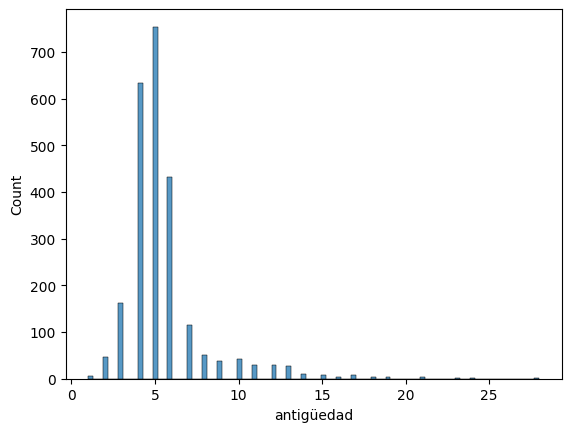

In [80]:
sns.histplot(data= df_bmw_5, x= 'antigüedad')

Inicialmente se puede apreciar la similitud en la distribución de los datos de ambas variables '**antigüedad**' y '**rango_antigüedad**' amvas teniendo una concentración de datos muy alta entre 4 y 6 años con un una distribución con sesgo hacia la derecha.

<Axes: xlabel='rango_antigüedad', ylabel='Count'>

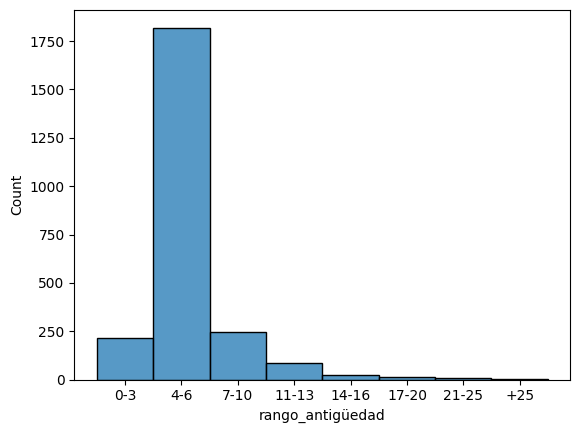

In [81]:
sns.histplot(data= df_bmw_5, x= 'rango_antigüedad')

Volvemos a analizar la distribución de las variables con la nueva variable 'rango_antigüedad'

In [82]:
conteo= df_bmw_5.groupby('modelo')['rango_antigüedad'].value_counts(normalize= True)
conteo_filtrado = conteo[conteo>0]
conteo_filtrado

modelo             rango_antigüedad
 Active Tourer     4-6                 1.000000
114                4-6                 0.900000
                   0-3                 0.100000
116                4-6                 0.821656
                   0-3                 0.082803
                   7-10                0.070064
                   11-13               0.019108
                   14-16               0.006369
118                4-6                 0.553846
                   0-3                 0.153846
                   11-13               0.153846
                   7-10                0.138462
120                4-6                 0.666667
                   7-10                0.208333
                   0-3                 0.083333
                   11-13               0.041667
125                4-6                 1.000000
135                4-6                 1.000000
214 Gran Tourer    0-3                 1.000000
216 Active Tourer  0-3                 1.000000
216 Gran Tourer    0-3                 1.000000
218                0-3                 0.666667
                   4-6                 0.333333
218 Active Tourer  0-3                 1.000000
218 Gran Tourer    0-3                 1.000000
220                0-3                 1.000000
220 Active Tourer  0-3                 1.000000
316                4-6                 0.879310
                   0-3                 0.043103
                   7-10                0.043103
                   17-20               0.017241
                   11-13               0.008621
                   +25                 0.008621
318                4-6                 0.809028
                   7-10                0.093750
                   0-3                 0.038194
                   11-13               0.038194
                   14-16               0.010417
                   21-25               0.006944
                   17-20               0.003472
318 Gran Turismo   4-6                 0.930233
                   0-3                 0.069767
320                4-6                 0.838889
                   11-13               0.055556
                   7-10                0.050000
                   0-3                 0.027778
                   14-16               0.016667
                   17-20               0.011111
320 Gran Turismo   4-6                 0.928571
                   0-3                 0.071429
325                7-10                0.428571
                   4-6                 0.357143
                   0-3                 0.142857
                   11-13               0.071429
325 Gran Turismo   4-6                 1.000000
328                4-6                 1.000000
330                4-6                 0.764706
                   0-3                 0.117647
                   11-13               0.117647
330 Gran Turismo   4-6                 0.666667
                   0-3                 0.333333
335                4-6                 0.500000
                   7-10                0.500000
335 Gran Turismo   4-6                 1.000000
418 Gran Coupé     0-3                 0.500000
                   4-6                 0.500000
420                4-6                 0.791667
                   0-3                 0.208333
420 Gran Coupé     4-6                 0.600000
                   0-3                 0.400000
430                4-6                 1.000000
430 Gran Coupé     0-3                 1.000000
435                4-6                 1.000000
435 Gran Coupé     0-3                 0.750000
                   4-6                 0.250000
518                4-6                 0.828571
                   0-3                 0.171429
520                4-6                 0.761194
                   7-10                0.140299
                   0-3                 0.062687
                   11-13               0.023881
                   14-16               0.011940
520 Gran Turismo   4-6      

A partir de la definición de la nueva variable '**rango_antigüedad**', se busca realizar un análisis más específico con esta variable agrupada y otras para poder facilitar la imputación de los valores desconocidos en esta columna.

Inicialmente se busca agrupar los registros por '**modelo**', **potencia**' y por '**rango_antigüedad**' para evaluar la distribución a nivel porporcional

In [83]:
conteo= df_bmw_5.groupby(['modelo', 'potencia'])['rango_antigüedad'].value_counts(normalize= True)
conteo_filtrado = conteo[conteo>0]
conteo_filtrado

modelo             potencia  rango_antigüedad
 Active Tourer     100.0     4-6                 1.000000
114                70.0      4-6                 0.800000
                             0-3                 0.200000
                   75.0      4-6                 1.000000
116                80.0      0-3                 1.000000
                   85.0      4-6                 0.833333
                             0-3                 0.073333
                             7-10                0.066667
                             11-13               0.020000
                             14-16               0.006667
                   87.0      4-6                 1.000000
                   90.0      7-10                1.000000
                   100.0     4-6                 1.000000
                   105.0     4-6                 1.000000
118                90.0      11-13               1.000000
                   95.0      11-13               1.000000
                   100.0     4-6                 0.714286
                             7-10                0.285714
                   105.0     4-6                 0.781250
                             7-10                0.156250
                             11-13               0.062500
                   110.0     0-3                 1.000000
                   127.0     4-6                 1.000000
120                110.0     11-13               1.000000
                   120.0     7-10                0.666667
                             4-6                 0.333333
                   130.0     7-10                1.000000
                   135.0     4-6                 1.000000
                   140.0     0-3                 1.000000
                   142.0     0-3                 1.000000
125                160.0     4-6                 1.000000
135                225.0     4-6                 1.000000
                   235.0     4-6                 1.000000
214 Gran Tourer    70.0      0-3                 1.000000
216 Active Tourer  85.0      0-3                 1.000000
216 Gran Tourer    85.0      0-3                 1.000000
218                110.0     0-3                 0.666667
                             4-6                 0.333333
218 Active Tourer  100.0     0-3                 1.000000
                   110.0     0-3                 1.000000
218 Gran Tourer    110.0     0-3                 1.000000
220                135.0     0-3                 1.000000
                   140.0     0-3                 1.000000
220 Active Tourer  140.0     0-3                 1.000000
316                66.0      +25                 1.000000
                   77.0      17-20               1.000000
                   85.0      4-6                 0.900901
                             0-3                 0.045045
                             7-10                0.045045
                             11-13               0.009009
                   87.0      4-6                 1.000000
318                85.0      14-16               0.600000
                             21-25               0.400000
                   90.0      11-13               1.000000
                   100.0     4-6                 0.842767
                             7-10                0.132075
                             0-3                 0.012579
                             11-13               0.012579
                   101.0     7-10                1.000000
                   105.0     4-6                 0.876106
                             0-3                 0.070796
                             7-10                0.044248
                             17-20               0.008850
                   110.0     0-3                 1.000000
318 Gran Turismo   100.0     4-6                 0.896552
                             0-3                 0.103448
                   105.0     4-6                 1.000000
320                100.0     17-20               1.000000
          

A continuación, se añade la dimensión '**km_rango**' al análisis de distribución por proporción.

La combinación de las tres columnas se utilizan con el fin de poder inferir la antigüedad del coche al tener normalmente modelos específicos que son lanzados al mercado en años específicos, la cantidad de uso o kilometraje que tiene cada coche y además el nivel de potencia que tiene el coche.

In [84]:
conteo= df_bmw_5.groupby(['modelo', 'potencia', 'km_rango'])['rango_antigüedad'].value_counts(normalize= True)
conteo_filtrado = conteo[conteo>0]
conteo_filtrado

modelo             potencia  km_rango   rango_antigüedad
 Active Tourer     100.0     30k-60k    4-6                 1.000000
114                70.0      10k-30k    0-3                 1.000000
                             60k-100k   4-6                 1.000000
                             +150k      4-6                 1.000000
                   75.0      10k-30k    4-6                 1.000000
                             30k-60k    4-6                 1.000000
116                80.0      10k-30k    0-3                 1.000000
                   85.0      0-10k      0-3                 1.000000
                             10k-30k    0-3                 0.571429
                                        4-6                 0.428571
                             30k-60k    4-6                 0.764706
                                        0-3                 0.235294
                             60k-100k   4-6                 0.920000
                                        0-3                 0.080000
                             100k-150k  4-6                 0.850746
                                        7-10                0.104478
                                        11-13               0.029851
                                        14-16               0.014925
                             +150k      4-6                 0.878788
                                        7-10                0.090909
                                        11-13               0.030303
                   87.0      100k-150k  4-6                 1.000000
                   90.0      60k-100k   7-10                1.000000
                   100.0     +150k      4-6                 1.000000
                   105.0     60k-100k   4-6                 1.000000
118                90.0      100k-150k  11-13               1.000000
                             +150k      11-13               1.000000
                   95.0      100k-150k  11-13               1.000000
                   100.0     10k-30k    4-6                 1.000000
                             60k-100k   4-6                 1.000000
                             100k-150k  4-6                 1.000000
                             +150k      7-10                0.800000
                                        4-6                 0.200000
                   105.0     30k-60k    4-6                 1.000000
                             60k-100k   4-6                 1.000000
                             100k-150k  4-6                 0.833333
                                        7-10                0.166667
                             +150k      4-6                 0.583333
                                        7-10                0.250000
                                        11-13               0.166667
                   110.0     10k-30k    0-3                 1.000000
                             30k-60k    0-3                 1.000000
                             60k-100k   0-3                 1.000000
                   127.0     100k-150k  4-6                 1.000000
120                110.0     +150k      11-13               1.000000
                   120.0     60k-100k   4-6                 1.000000
                             +150k      7-10                1.000000
                   130.0     +150k      7-10                1.000000
                   135.0     30k-60k    4-6                 1.000000
                             60k-100k   4-6                 1.000000
                             100k-150k  4-6                 1.000000
                             +150k      4-6                 1.000000
                   140.0     60k-100k   0-3                 1.000000
                   142.0     60k-100k   0-3                 1.000000
125                160.0     10k-30k    4-6                 1.000000
                             +150k      4-6                 1.000000
135                225.0     100k-150k  4-6                 1.000000
          

Vemos que se mantiene la distribución.

Procedemos a **imputar los valores nulos**, mediante las variables estudiadas anteriormente. En este caso **'modelo', 'potencia', 'km_rango'**. Después de revisar las opciones de imputación, decidimos hacer una **imputación jerárquica por muestreo aleatorio**. Aunque es cierto que puede variar la distribución cada vez que imputamos (porque coge valores de los grupos al azar), este variación **nunca supera el 2-3%**, porcentaje inferior al que recibimos al imputar la moda.

In [85]:
df_bmw_6 = imputar_jerarquica_muestreo_aleatorio(df_bmw_5, 'rango_antigüedad', ['modelo','potencia','km_rango'])

Nulos iniciales= 2410
Nulos imputados con grupo ['modelo', 'potencia', 'km_rango'] = 2202
Nulos imputados con grupo ['modelo', 'potencia'] = 137
Nulos imputados con grupo ['modelo', 'km_rango'] = 38
Nulos imputados con grupo ['modelo'] = 15
Nulos totales imputados = 2392
Nulos no imputados = 18


In [86]:
df_bmw_6['rango_antigüedad'].value_counts(normalize= True)*100

rango_antigüedad
4-6      77.067278
7-10     10.372839
0-3       7.560925
11-13     3.207665
14-16     0.874818
17-20     0.749844
21-25     0.145803
+25       0.020829
Name: proportion, dtype: float64

In [87]:
get_nulos(df_bmw_6)

columna  cant.nulos  % nulos
0             antigüedad        2410    50.01
1              bluetooth         725    15.04
2   alerta_lim_velocidad         724    15.02
3     aire_acondicionado         482    10.00
4                  color         442     9.17
5       rango_antigüedad          18     0.37
6                 modelo           0     0.00
7               potencia           0     0.00
8                     km           0     0.00
9   elevalunas_electrico           0     0.00
10        camara_trasera           0     0.00
11     volante_regulable           0     0.00
12            tipo_coche           0     0.00
13             año_venta           0     0.00
14                precio           0     0.00
15             mes_venta           0     0.00
16              km_rango           0     0.00

In [88]:
# Nos quedan 18 nulos, a los que le imputaremos la moda general de la variable rango_antigüedad.
# Ya que suponen un 0,37% del dataframe no creemos que el cambio afecte significativamente.

df_bmw_6['rango_antigüedad'].fillna(df_bmw_6['rango_antigüedad'].mode().iloc[0], inplace= True)

Vemos como ha variado la distribución pre y post imputación, donde los valores '4-6' y '0-3' años tuvieron variaciones en la distribución después de la imputación. Sin embargo, se ve que esta variación fue menor al 5% y que los valores porcentuales en los otros valores es muy similar, validando así que la imputación de la variable '**rango_antigüedad**' no tuvo un impacto negativo en la distribución.

In [89]:
df_bmw_5['rango_antigüedad'].value_counts(normalize= True)*100

rango_antigüedad
4-6      75.550021
7-10     10.253217
0-3       8.841843
11-13     3.569946
14-16     0.913242
17-20     0.581154
21-25     0.249066
+25       0.041511
Name: proportion, dtype: float64

In [90]:
df_bmw_6['rango_antigüedad'].value_counts(normalize= True)*100

rango_antigüedad
4-6      77.152936
7-10     10.334094
0-3       7.532683
11-13     3.195684
14-16     0.871550
17-20     0.747043
21-25     0.145258
+25       0.020751
Name: proportion, dtype: float64

In [91]:
get_nulos(df_bmw_6)

columna  cant.nulos  % nulos
0             antigüedad        2410    50.01
1              bluetooth         725    15.04
2   alerta_lim_velocidad         724    15.02
3     aire_acondicionado         482    10.00
4                  color         442     9.17
5                 modelo           0     0.00
6             tipo_coche           0     0.00
7               potencia           0     0.00
8                     km           0     0.00
9   elevalunas_electrico           0     0.00
10        camara_trasera           0     0.00
11     volante_regulable           0     0.00
12                precio           0     0.00
13             año_venta           0     0.00
14             mes_venta           0     0.00
15              km_rango           0     0.00
16      rango_antigüedad           0     0.00

In [92]:
#Finalmente, se renombra la variable rango_antiguedad por antigüedad.
df_bmw_6['antigüedad'] = df_bmw_6['rango_antigüedad']
df_bmw_6.drop(columns= ['rango_antigüedad'], inplace = True)

In [93]:
df_bmw_6.head()

modelo        km  potencia   color   tipo_coche volante_regulable  \
0    118  140411.0     100.0   black    hatchback              True   
1     M4   13929.0     317.0    grey  convertible              True   
2    320  183297.0     120.0   white       estate             False   
3    420  128035.0     135.0     red  convertible              True   
4    425   97097.0     160.0  silver        coupe              True   

  aire_acondicionado camara_trasera elevalunas_electrico bluetooth  \
0               True          False                 True       NaN   
1               True          False                False      True   
2              False          False                 True     False   
3               True          False                 True      True   
4               True          False                False      True   

  alerta_lim_velocidad   precio  año_venta  mes_venta antigüedad   km_rango  
0                  NaN  11300.0       2018          1        4-6  100k-150k  
1                 True  69700.0       2018          2        0-3    10k-30k  
2                False  10200.0       2018          2        4-6      +150k  
3                  NaN  25100.0       2018          2        4-6  100k-150k  
4                 True  33400.0       2018          4        4-6   60k-100k

### **Bluetooth**

In [94]:
get_nulos(df_bmw_6)

columna  cant.nulos  % nulos
0              bluetooth         725    15.04
1   alerta_lim_velocidad         724    15.02
2     aire_acondicionado         482    10.00
3                  color         442     9.17
4               potencia           0     0.00
5             tipo_coche           0     0.00
6                     km           0     0.00
7                 modelo           0     0.00
8         camara_trasera           0     0.00
9      volante_regulable           0     0.00
10  elevalunas_electrico           0     0.00
11                precio           0     0.00
12             año_venta           0     0.00
13             mes_venta           0     0.00
14            antigüedad           0     0.00
15              km_rango           0     0.00

Al realizar el estudio de distribución para la variable '**bluetooth**', se observa que la distribución entre valores True y False el lo suficientemente variada como para considerarla potencialmente de valor para el desarrollo del modelo.

In [95]:
df_bmw_6['bluetooth'].value_counts(normalize= True)*100

bluetooth
False    75.793845
True     24.206155
Name: proportion, dtype: float64

Para la imputación de los valores nulos, se opta por utilizar la función de muestreo aleatorio jerárquico a partir de las variables '**modelo**',' **tipo_coche**'y'**antigüedad**' puesto que ellas podrían indicarnos aproximaciones en cuanto al nivel de tecnología que dichos coches podrían tener, entre ellas la tecnología integrada en la funcionalidad de bluetooth.

In [96]:
df_bmw_7 = imputar_jerarquica_muestreo_aleatorio(df_bmw_6, 'bluetooth', ['modelo','tipo_coche','antigüedad'])

Nulos iniciales= 725
Nulos imputados con grupo ['modelo', 'tipo_coche', 'antigüedad'] = 717
Nulos imputados con grupo ['modelo', 'tipo_coche'] = 6
Nulos imputados con grupo ['modelo', 'antigüedad'] = 1
Nulos imputados con grupo ['modelo'] = 0
Nulos totales imputados = 724
Nulos no imputados = 1


In [97]:
df_bmw_7['bluetooth'].fillna(df_bmw_7['bluetooth'].mode().iloc[0], inplace= True)

Para aquellos valores nulos que no pudieron ser imputados a partir del método de muestreo aleatorio, se utiliza la moda general de la columna 'bluetooth'.

In [98]:
df_bmw_6['bluetooth'].value_counts(normalize= True)*100

bluetooth
False    75.793845
True     24.206155
Name: proportion, dtype: float64

In [99]:
df_bmw_7['bluetooth'].value_counts(normalize= True)*100

bluetooth
False    76.924673
True     23.075327
Name: proportion, dtype: float64

Una vez realizada la imputación, se observa que la distribución de los valores True y False; antes y después del proceso de imputación, son muy similares teniendo únicamente una variación de 2% siendo un margen aceptable.

### **Alerta Límite de Velocidad**

In [100]:
get_nulos(df_bmw_7)

columna  cant.nulos  % nulos
0   alerta_lim_velocidad         724    15.02
1     aire_acondicionado         482    10.00
2                  color         442     9.17
3                     km           0     0.00
4               potencia           0     0.00
5             tipo_coche           0     0.00
6      volante_regulable           0     0.00
7                 modelo           0     0.00
8         camara_trasera           0     0.00
9   elevalunas_electrico           0     0.00
10             bluetooth           0     0.00
11                precio           0     0.00
12             año_venta           0     0.00
13             mes_venta           0     0.00
14            antigüedad           0     0.00
15              km_rango           0     0.00

In [101]:
df_bmw_7['alerta_lim_velocidad'].value_counts(normalize= True)*100

alerta_lim_velocidad
True     54.407814
False    45.592186
Name: proportion, dtype: float64

Al igual que con la variable 'bluetooth', para la imputación de los valores nulos en '**alerta_lim_velocidad**' se opta por utilizar el apoyo de las variables '**modelo**',' **tipo_coche**'y'**antigüedad**' puesto que ellas podrían indicarnos aproximaciones en cuanto al nivel de tecnología que dichos coches podrían tener, entre ellas la tecnología integrada en la funcionalidad de alerta de límite de velocidad.

Para esta imputación se utiliza el método de moda en lugar del muestreo aleatorio para reducir la variación de la distribución pre y post imputación.

In [102]:
df_bmw_8 = imputar_jerarquica_metodo(df_bmw_7, 'alerta_lim_velocidad', ['modelo','tipo_coche','antigüedad'], 'mode')

Nulos iniciales= 724
Nulos imputados con grupo ['modelo', 'tipo_coche', 'antigüedad'] = 711
Nulos imputados con grupo ['modelo', 'tipo_coche'] = 7
Nulos imputados con grupo ['modelo', 'antigüedad'] = 5
Nulos imputados con grupo ['modelo'] = 0
Nulos totales imputados = 723
Nulos no imputados = 1


In [103]:
df_bmw_8['alerta_lim_velocidad'].fillna(df_bmw_8['alerta_lim_velocidad'].mode().iloc[0], inplace= True)

Para aquellos valores que no pudieron ser imputados a partir del método de jerarquía, se opta por utilizar la moda genérica del valor 'alerta_lim_velocidad'.

In [104]:
df_bmw_7['alerta_lim_velocidad'].value_counts(normalize= True)*100

alerta_lim_velocidad
True     54.407814
False    45.592186
Name: proportion, dtype: float64

Una vez realizada la imputación, se observa que la variación de la distribución es baja, teniendo únicamente una variación del 1% siendo esta considerada aceptable para continuar con el proceso de imputación.

In [105]:
df_bmw_8['alerta_lim_velocidad'].value_counts(normalize= True)*100

alerta_lim_velocidad
True     55.073667
False    44.926333
Name: proportion, dtype: float64

Explicación

### **Aire Acondicionado**

Explicación

In [106]:
get_nulos(df_bmw_8)

columna  cant.nulos  % nulos
0     aire_acondicionado         482    10.00
1                  color         442     9.17
2                     km           0     0.00
3                 modelo           0     0.00
4               potencia           0     0.00
5             tipo_coche           0     0.00
6      volante_regulable           0     0.00
7         camara_trasera           0     0.00
8   elevalunas_electrico           0     0.00
9              bluetooth           0     0.00
10  alerta_lim_velocidad           0     0.00
11                precio           0     0.00
12             año_venta           0     0.00
13             mes_venta           0     0.00
14            antigüedad           0     0.00
15              km_rango           0     0.00

In [107]:
df_bmw_8['aire_acondicionado'].value_counts(normalize= True)*100

aire_acondicionado
True     79.525017
False    20.474983
Name: proportion, dtype: float64

Al igual que con la variable 'bluetooth', para la imputación de los valores nulos en '**aire_acondicionado**' se opta por utilizar el método por jerarquía de muestra aleatoria de las variables '**modelo**',' **tipo_coche**'y'**antigüedad**' puesto que ellas podrían indicarnos aproximaciones en cuanto si la funcionalidad de AC podría estar incluida en el coche.

Para esta imputación se utiliza el método de moda en lugar del muestreo aleatorio para reducir la variación de la distribución pre y post imputación.

In [108]:
df_bmw_9 = imputar_jerarquica_muestreo_aleatorio(df_bmw_8, 'aire_acondicionado', ['modelo','tipo_coche','antigüedad'])

Nulos iniciales= 482
Nulos imputados con grupo ['modelo', 'tipo_coche', 'antigüedad'] = 473
Nulos imputados con grupo ['modelo', 'tipo_coche'] = 6
Nulos imputados con grupo ['modelo', 'antigüedad'] = 1
Nulos imputados con grupo ['modelo'] = 0
Nulos totales imputados = 480
Nulos no imputados = 2


Para la imputación de los nulos que no pudieron ser rellenados a través del método de muestreo aleatorio, se aplica la moda general de la variable 'aire_acondicionado'.

In [109]:
df_bmw_9['aire_acondicionado'].fillna(df_bmw_9['aire_acondicionado'].mode().iloc[0], inplace= True)

In [110]:
df_bmw_8['aire_acondicionado'].value_counts(normalize= True)*100

aire_acondicionado
True     79.525017
False    20.474983
Name: proportion, dtype: float64

Finalmente, se observa que la variación de la distribución de proporción en los datos es muy baja, siendo esta únicamente del 1% después de la imputación, por lo cual se opta en asumir la variación con el fin de rellenar los nulos.

In [111]:
df_bmw_9['aire_acondicionado'].value_counts(normalize= True)*100

aire_acondicionado
True     78.418759
False    21.581241
Name: proportion, dtype: float64

Explicación

### **Color**

In [112]:
get_nulos(df_bmw_9)

columna  cant.nulos  % nulos
0                  color         442     9.17
1                 modelo           0     0.00
2                     km           0     0.00
3               potencia           0     0.00
4             tipo_coche           0     0.00
5      volante_regulable           0     0.00
6     aire_acondicionado           0     0.00
7         camara_trasera           0     0.00
8   elevalunas_electrico           0     0.00
9              bluetooth           0     0.00
10  alerta_lim_velocidad           0     0.00
11                precio           0     0.00
12             año_venta           0     0.00
13             mes_venta           0     0.00
14            antigüedad           0     0.00
15              km_rango           0     0.00

In [113]:
df_bmw_9['color'].value_counts(normalize= True)*100

color
black     33.995888
grey      24.377427
blue      14.690427
white     11.034955
brown      6.899703
silver     6.625543
red        1.073795
beige      0.845328
green      0.319854
orange     0.137080
Name: proportion, dtype: float64

Vamos a **remplazar los valores <5%** de frecuencia por una nueva categoria **'otros'** para tratar de mejorar la imputación y ser más exactos.


In [114]:
df_bmw_9['color'].replace(['red', 'beige', 'green', 'orange'],'otros', inplace= True)

In [115]:
df_bmw_9['color'].value_counts(normalize= True)*100

color
black     33.995888
grey      24.377427
blue      14.690427
white     11.034955
brown      6.899703
silver     6.625543
otros      2.376057
Name: proportion, dtype: float64

Una vez realizada la agrupación de ciertos colores, se realiza un análisis de cruce de variables entre tipo de coche y color para tratar de identificar si es que existe algún color que sea específico para un tipo de coche determinado, donde podemos ver que no es el caso.

<Axes: xlabel='tipo_coche', ylabel='color'>

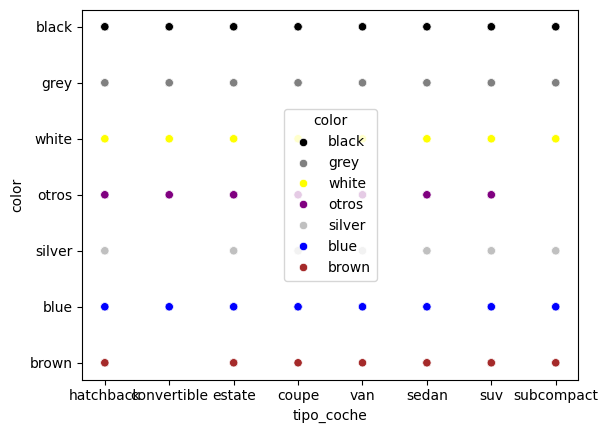

In [116]:
colores = ['black', 'grey', 'yellow', 'purple', 'silver', 'blue', 'brown']
sns.scatterplot(data = df_bmw_9, x = 'tipo_coche', y= 'color', hue = 'color', palette = colores)

<Axes: xlabel='potencia', ylabel='color'>

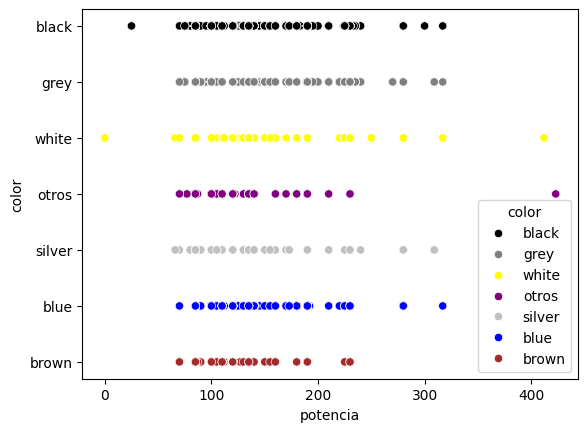

In [117]:
sns.scatterplot(data = df_bmw_9, x = 'potencia', y= 'color', hue = 'color', palette = colores)

<Axes: xlabel='antigüedad', ylabel='color'>

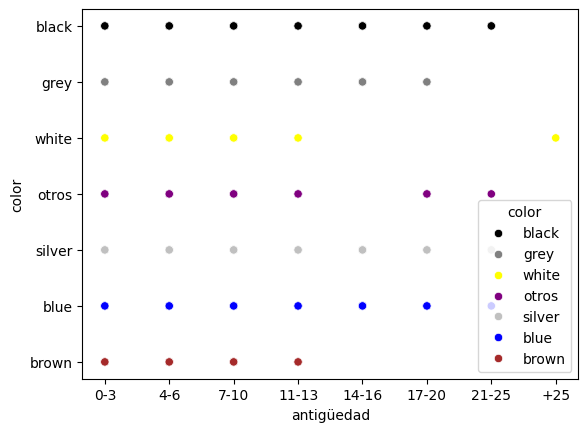

In [118]:
sns.scatterplot(data = df_bmw_9, x = 'antigüedad', y= 'color', hue = 'color', palette = colores)

Como vemos que la **distribución es bastante pareja** y no se diferencia por nada. Decidimos hacer una **imputación de muestreo aleatoria** por las variables (**modelo, tipo_coche, antigüedad**) , para mantener la variabilidad de los datos.

In [119]:
df_bmw_10 = imputar_jerarquica_muestreo_aleatorio(df_bmw_9, 'color', ['modelo','tipo_coche','antigüedad'])

Nulos iniciales= 442
Nulos imputados con grupo ['modelo', 'tipo_coche', 'antigüedad'] = 432
Nulos imputados con grupo ['modelo', 'tipo_coche'] = 5
Nulos imputados con grupo ['modelo', 'antigüedad'] = 4
Nulos imputados con grupo ['modelo'] = 0
Nulos totales imputados = 441
Nulos no imputados = 1


In [120]:
df_bmw_10['color'].fillna(df_bmw_10['color'].mode().iloc[0], inplace= True)

Para aquellos valores nulos que no pudieron ser imputados a través del método de muestreo aleatorio, se utiliza la moda de la columna color.

In [121]:
df_bmw_9['color'].value_counts(normalize= True)*100

color
black     33.995888
grey      24.377427
blue      14.690427
white     11.034955
brown      6.899703
silver     6.625543
otros      2.376057
Name: proportion, dtype: float64

Una vez realizada la imputación, se observa que no hubo cambios en la distribución proporcional de datos por color lo cual nos indica que no se afectó estdísticamente los datos después de dicho proceso de llenado de datos.

In [122]:
df_bmw_10['color'].value_counts(normalize= True)*100

color
black     32.869890
grey      25.814484
blue      14.505084
white     10.417099
silver     7.242166
brown      6.661133
otros      2.490143
Name: proportion, dtype: float64

In [123]:
df_bmw_nn = df_bmw_10.copy()

Finalmente tras el proceso de imputación de nulos a través de distintos métodos y técnicas, se obtiene un DataFrame con todas las columnas y filas con datos.

A partir de estos datos se puede proceder al análisis de outliers por cada variable para normalizar los datos, en aquellos casos que correspondan.

In [124]:
get_nulos(df_bmw_nn)

columna  cant.nulos  % nulos
0                 modelo           0      0.0
1                     km           0      0.0
2               potencia           0      0.0
3                  color           0      0.0
4             tipo_coche           0      0.0
5      volante_regulable           0      0.0
6     aire_acondicionado           0      0.0
7         camara_trasera           0      0.0
8   elevalunas_electrico           0      0.0
9              bluetooth           0      0.0
10  alerta_lim_velocidad           0      0.0
11                precio           0      0.0
12             año_venta           0      0.0
13             mes_venta           0      0.0
14            antigüedad           0      0.0
15              km_rango           0      0.0

## **0.3 Tratamiento de outliers**

### **EDA Inicial**

Primera vista de las variables según su tipo.

In [125]:
df_bmw_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   modelo                4819 non-null   object  
 1   km                    4819 non-null   float64 
 2   potencia              4819 non-null   float64 
 3   color                 4819 non-null   object  
 4   tipo_coche            4819 non-null   object  
 5   volante_regulable     4819 non-null   object  
 6   aire_acondicionado    4819 non-null   bool    
 7   camara_trasera        4819 non-null   object  
 8   elevalunas_electrico  4819 non-null   object  
 9   bluetooth             4819 non-null   bool    
 10  alerta_lim_velocidad  4819 non-null   bool    
 11  precio                4819 non-null   float64 
 12  año_venta             4819 non-null   int32   
 13  mes_venta             4819 non-null   int32   
 14  antigüedad            4819 non-null   category
 15  km_r

modelo
320                  0.155011
520                  0.130733
318                  0.117244
X3                   0.090683
116                  0.074289
X1                   0.056858
316                  0.048143
X5                   0.047935
525                  0.037767
530                  0.032579
118                  0.029674
318 Gran Turismo     0.020129
320 Gran Turismo     0.015148
518                  0.013696
X4                   0.009546
535                  0.009338
X6                   0.009131
420                  0.008923
120                  0.007470
330                  0.006848
420 Gran Coupé       0.006848
730                  0.006848
520 Gran Turismo     0.004773
325                  0.003943
530 Gran Turismo     0.003735
640 Gran Coupé       0.003735
740                  0.003735
X5 M                 0.003528
114                  0.003113
218 Active Tourer    0.002698
M550                 0.002490
218                  0.002490
218 Gran Tourer      0.001868
418

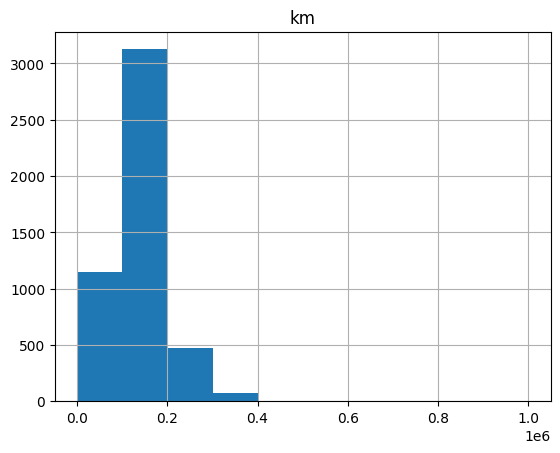

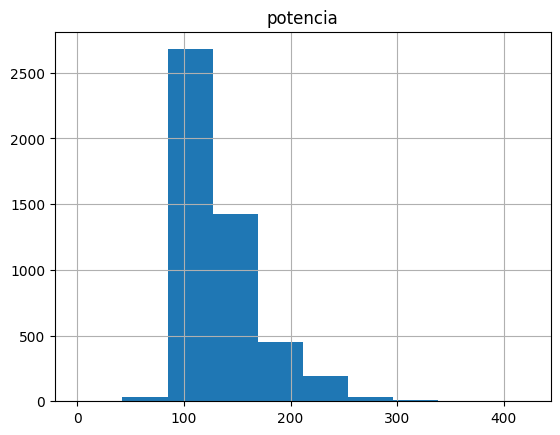

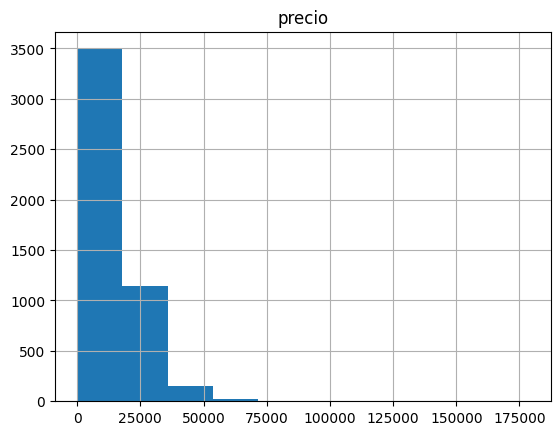

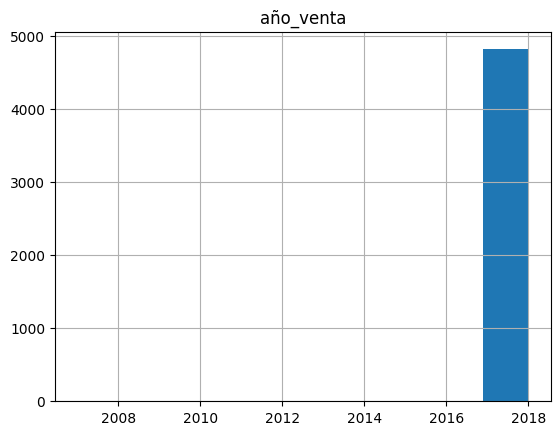

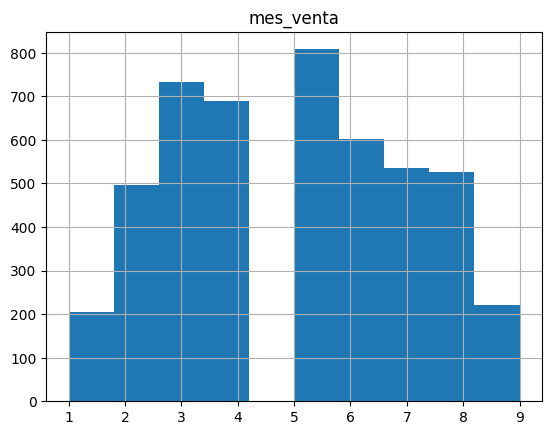

In [126]:
EDA_variables(df_bmw_nn)

### **Variables Booleanas**

Las **variables booleanas**, luego de visualizar el EDA inicial, podemos confirmar que los valores **no estan concentrados hacia una respuesta específica**.

En este conteo se valida que cada una de estas columnas posee una distribución aceptable. Esto confirma que **no será necesario ninguna modificación o eliminación** de estas variables.


### **Variables Categóricas**

#### **Color**

In [127]:
df_bmw_nn['color'].value_counts(normalize= True)*100

color
black     32.869890
grey      25.814484
blue      14.505084
white     10.417099
silver     7.242166
brown      6.661133
otros      2.490143
Name: proportion, dtype: float64

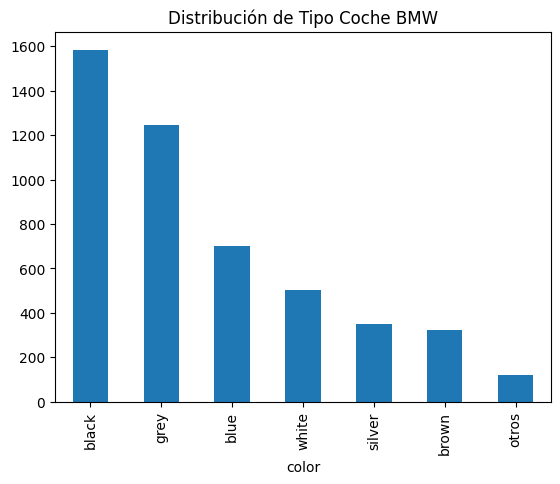

In [128]:
df_bmw_nn['color'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipo Coche BMW')
plt.show()

En la distribución de color se puede ver que a pesar de tener una menor frecuencia de registros en la categoría **otros**, al no tener tantas categorías no será necesario agrupar respuestas en una sola categoría.

#### **Tipo Coche**

In [129]:
df_bmw_nn['tipo_coche'].value_counts(normalize= True)*100

tipo_coche
estate         35.671301
suv            21.975514
sedan          21.664246
hatchback      15.293629
coupe           2.033617
subcompact      1.701598
van             0.850799
convertible     0.809297
Name: proportion, dtype: float64

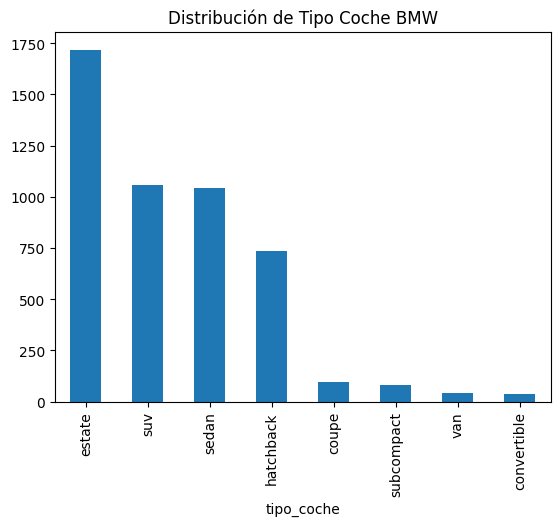

In [130]:
df_bmw_nn['tipo_coche'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipo Coche BMW')
plt.show()

En la distribución de tipo_coche se puede ver que a pesar de tener una menor frecuencia de registros en la categoría ***van*** y ***convertible***, al no tener tantas categorías no será necesario agrupar respuestas en una sola categoría.

#### **Rango Kilometraje**

In [131]:
df_bmw_nn['km_rango'].value_counts(normalize=True) * 100

km_rango
+150k        43.577506
100k-150k    32.911392
60k-100k     15.065366
30k-60k       6.038597
10k-30k       2.137373
0-10k         0.269766
Name: proportion, dtype: float64

En la distribución de los datos a través de estos rangos previamente creados, se identifica que el rango de ***0-10k*** representa únicamente el 0.26% de la distribuvión total.

Para poder contar con un rango más representativo se opta por combinarlo con el rango inmediato superior de ***10k-30k***	(con una representación del 2.13%) para así tener un nuevo rango más representativo siendo este el de ***0-30k*** con una representatividad de 2.40%.

In [132]:
df_bmw_nn_2 = df_bmw_nn.copy()

In [133]:
df_bmw_nn_2['km_rango'].replace(['0-10k', '10k-30k'], '0-30k', inplace = True)

In [134]:
df_bmw_nn_2['km_rango'].value_counts(normalize=True) * 100

km_rango
+150k        43.577506
100k-150k    32.911392
60k-100k     15.065366
30k-60k       6.038597
0-30k         2.407138
Name: proportion, dtype: float64

#### **Antigüedad**

In [135]:
df_bmw_nn_2['antigüedad'].value_counts(normalize=True) * 100

antigüedad
4-6      77.152936
7-10     10.334094
0-3       7.532683
11-13     3.195684
14-16     0.871550
17-20     0.747043
21-25     0.145258
+25       0.020751
Name: proportion, dtype: float64

En la distribución de los datos a través de estos rangos previamente creados, se identifican **cuatro distintas categorías continuas** que cada una representa **menos de 1%** de la distribución total no siendo tan representativas de manera individual.

Para poder contar con un rango más representativo **se opta crear una nueva categoría más representativa** que permita un análisis más robusto.

**Categorías antiguas:**'14-16','17-20', '21-25', '+25'.

**Nueva categoría:** '+13'.

In [136]:
df_bmw_nn_3 = df_bmw_nn_2.copy()

In [137]:
mas_13= []
for rango, porcentaje in df_bmw_nn_3['antigüedad'].value_counts(normalize= True).items():
  if porcentaje*100 <1:
    mas_13.append(rango)

In [138]:
df_bmw_nn_3['antigüedad'].replace(mas_13, '+13', inplace = True)

In [139]:
df_bmw_nn_3['antigüedad'].value_counts(normalize=True) * 100

antigüedad
4-6      77.152936
7-10     10.334094
0-3       7.532683
11-13     3.195684
+13       1.784603
Name: proportion, dtype: float64

#### **Modelo**

In [140]:
pd.set_option('display.max_rows', None)

In [141]:
df_bmw_nn_3['modelo'].value_counts(normalize= True)*100

modelo
320                  15.501141
520                  13.073252
318                  11.724424
X3                    9.068271
116                   7.428927
X1                    5.685827
316                   4.814277
X5                    4.793526
525                   3.776717
530                   3.257937
118                   2.967421
318 Gran Turismo      2.012866
320 Gran Turismo      1.514837
518                   1.369579
X4                    0.954555
535                   0.933804
X6                    0.913053
420                   0.892301
120                   0.747043
330                   0.684789
420 Gran Coupé        0.684789
730                   0.684789
520 Gran Turismo      0.477277
325                   0.394273
530 Gran Turismo      0.373521
640 Gran Coupé        0.373521
740                   0.373521
X5 M                  0.352770
114                   0.311268
218 Active Tourer     0.269766
M550                  0.249014
218                   0.249014
218 Gran Tourer       0.186761
418 Gran Coupé        0.166010
X6 M                  0.166010
335                   0.145258
M3                    0.145258
640                   0.145258
528                   0.124507
435 Gran Coupé        0.124507
i3                    0.124507
Z4                    0.124507
125                   0.103756
328                   0.103756
325 Gran Turismo      0.083005
216 Gran Tourer       0.083005
430 Gran Coupé        0.083005
523                   0.083005
135                   0.083005
435                   0.083005
330 Gran Turismo      0.062254
220                   0.062254
216 Active Tourer     0.062254
M235                  0.062254
335 Gran Turismo      0.062254
X5 M50                0.062254
650                   0.041502
425                   0.041502
M4                    0.041502
430                   0.041502
535 Gran Turismo      0.041502
123                   0.041502
750                   0.041502
635                   0.020751
225                   0.020751
i8                    0.020751
630                   0.020751
M135                  0.020751
M5                    0.020751
735                   0.020751
ActiveHybrid 5        0.020751
216                   0.020751
220 Active Tourer     0.020751
 Active Tourer        0.020751
225 Active Tourer     0.020751
214 Gran Tourer       0.020751
Name: proportion, dtype: float64

In [142]:
df_bmw_nn_3['modelo'].nunique()

76

Agrupamos todos los valores **inferiores al 1%** en una variable nueva variable y vemos como se distribuyen.

In [143]:
df_bmw_nn_4 = df_bmw_nn_3.copy()

In [144]:

otros=[]
for  modelo, porcentaje in df_bmw_nn_4['modelo'].value_counts(normalize= True).items():
  if porcentaje*100 <1:
    otros.append(modelo)



In [145]:
otros

['X4',
 '535',
 'X6',
 '420',
 '120',
 '330',
 '420 Gran Coupé',
 '730',
 '520 Gran Turismo',
 '325',
 '530 Gran Turismo',
 '640 Gran Coupé',
 '740',
 'X5 M',
 '114',
 '218 Active Tourer',
 'M550',
 '218',
 '218 Gran Tourer',
 '418 Gran Coupé',
 'X6 M',
 '335',
 'M3',
 '640',
 '528',
 '435 Gran Coupé',
 'i3',
 'Z4',
 '125',
 '328',
 '325 Gran Turismo',
 '216 Gran Tourer',
 '430 Gran Coupé',
 '523',
 '135',
 '435',
 '330 Gran Turismo',
 '220',
 '216 Active Tourer',
 'M235',
 '335 Gran Turismo',
 'X5 M50',
 '650',
 '425',
 'M4',
 '430',
 '535 Gran Turismo',
 '123',
 '750',
 '635',
 '225',
 'i8',
 '630',
 'M135',
 'M5',
 '735',
 'ActiveHybrid 5',
 '216',
 '220 Active Tourer',
 ' Active Tourer',
 '225 Active Tourer',
 '214 Gran Tourer']

In [146]:
len(otros)

62

In [147]:
for modelo in df_bmw_nn_4['modelo']:
  if modelo in otros:
    df_bmw_nn_4['modelo'].replace(modelo, 'otros', inplace= True)

In [148]:
df_bmw_nn_4['modelo'].value_counts(normalize=True)*100

modelo
320                 15.501141
520                 13.073252
otros               13.010998
318                 11.724424
X3                   9.068271
116                  7.428927
X1                   5.685827
316                  4.814277
X5                   4.793526
525                  3.776717
530                  3.257937
118                  2.967421
318 Gran Turismo     2.012866
320 Gran Turismo     1.514837
518                  1.369579
Name: proportion, dtype: float64

In [149]:
df_bmw_nn_4['modelo'].nunique()

15

**Resultado:** Decidimos **agrupar todos los valores** que se encontraban por **debajo del 1%** en una nueva categoria (**otros**). Ahora **otros** representa un **13,01%** del dataset.

- **Implicaciones:**

 - Ahora otros tiene un peso relevante.
 - También perdemos detalles de los modelos raros, en el caso de que tuvieramos interés en ellos.
 - Hemos eliminado ruido y complejidad al análisis así facilitaremos la interpretación.
 - Cuando hagamos procesamiento de variables evitaremos columnas con poca información.


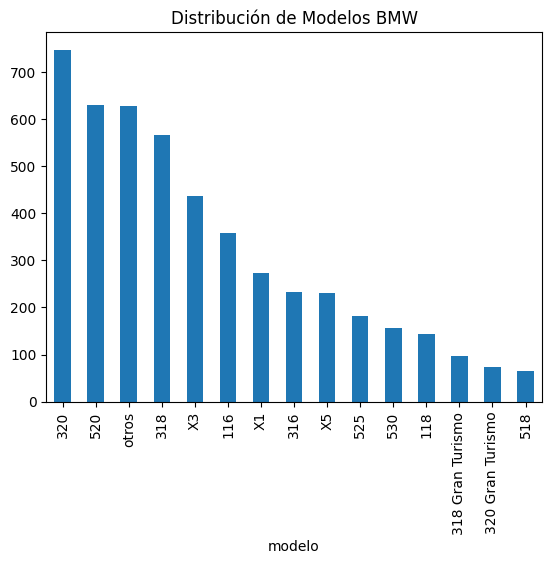

In [150]:
df_bmw_nn_4['modelo'].value_counts().plot(kind='bar')
plt.title('Distribución de Modelos BMW')
plt.show()

### **Variables Numéricas**

#### **Mes Venta**

In [151]:
df_bmw_nn_4['mes_venta'].value_counts(normalize= True) * 100

mes_venta
5    16.766964
3    15.189873
4    14.318323
6    12.492218
7    11.122640
8    10.935879
2    10.313343
9     4.606765
1     4.253995
Name: proportion, dtype: float64

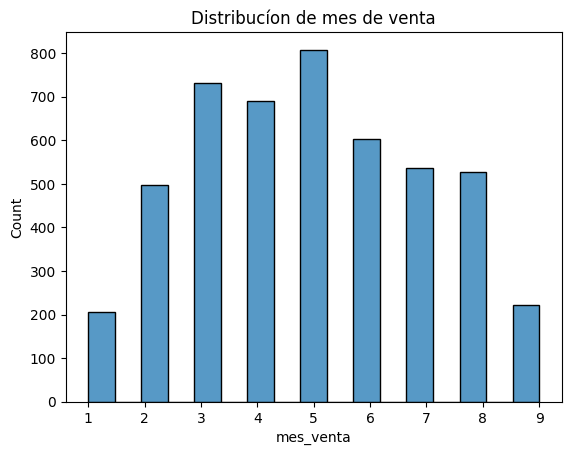

In [152]:
sns.histplot(x=df_bmw_nn_4['mes_venta'])
plt.title('Distribucíon de mes de venta')
plt.show()

<Axes: xlabel='mes_venta'>

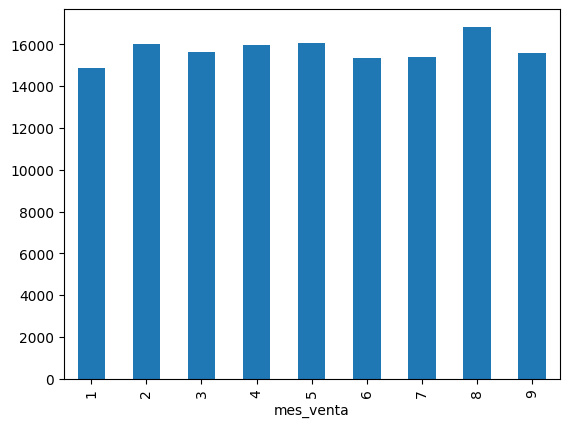

In [153]:
# mes de venta agrupado por meses. Para ver si varia en función del mes
df_bmw_nn_4.groupby('mes_venta')['precio'].mean().plot(kind='bar')

In [154]:
# estudiamos la correlación entre variables
df_bmw_nn_4[['mes_venta', 'precio']].corr()

mes_venta    precio
mes_venta   1.000000  0.013889
precio      0.013889  1.000000

Por un lado, el **precio de venta no varía en función de los meses** y su **correlación es muy baja**. Por otro lado, **nos faltan meses por conocer** y el modelo no podrá buscar un patrón en los meses faltantes. Por ello, decidimos prescindir de ella y eliminarla.

In [155]:
df_bmw_nn_5= df_bmw_nn_4.copy()

In [156]:
df_bmw_nn_5.drop(columns='mes_venta', axis= 1,  inplace= True)

In [157]:
df_bmw_nn_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   modelo                4819 non-null   object  
 1   km                    4819 non-null   float64 
 2   potencia              4819 non-null   float64 
 3   color                 4819 non-null   object  
 4   tipo_coche            4819 non-null   object  
 5   volante_regulable     4819 non-null   object  
 6   aire_acondicionado    4819 non-null   bool    
 7   camara_trasera        4819 non-null   object  
 8   elevalunas_electrico  4819 non-null   object  
 9   bluetooth             4819 non-null   bool    
 10  alerta_lim_velocidad  4819 non-null   bool    
 11  precio                4819 non-null   float64 
 12  año_venta             4819 non-null   int32   
 13  antigüedad            4819 non-null   category
 14  km_rango              4819 non-null   category
dtypes: b

#### **Año Venta**

In [158]:
df_bmw_nn_5['año_venta'].value_counts(normalize= True) * 100

año_venta
2018    99.958498
2007     0.020751
2009     0.020751
Name: proportion, dtype: float64

Al profundizar en los registros de la variable del Año de la venta, se identifica que existen **dos registros únicos** para los **años 2009 y 2007** siendo estos valores muy pequeños como para tener un impacto en el modelo a nivel variabilidad de datos.

Para simplificar el enfoque del análisis del modelo, **se opta por eliminar la columna año_venta**

In [159]:
df_bmw_nn_6 = df_bmw_nn_5.copy()

In [160]:
df_bmw_nn_6[df_bmw_nn_6['año_venta'] == 2018]
df_bmw_nn_6.drop(columns=['año_venta'], inplace = True)

#### **Potencia**

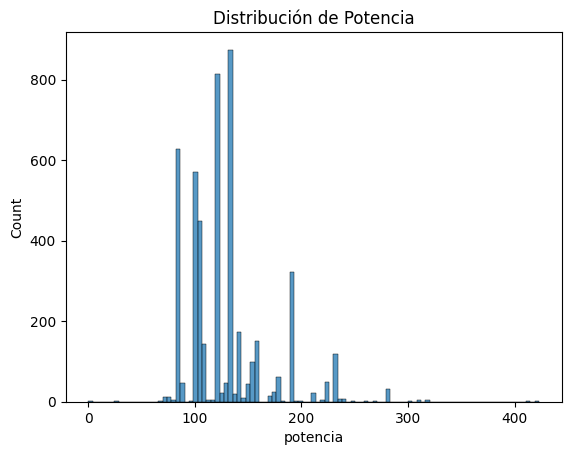

In [161]:
sns.histplot(x=df_bmw_nn_6['potencia'])
plt.title('Distribución de Potencia')
plt.show()

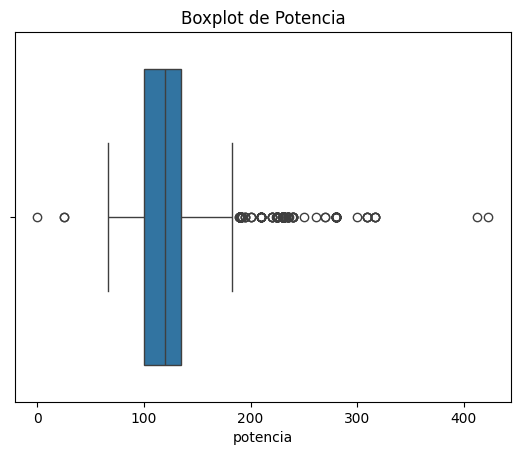

In [162]:
sns.boxplot(x=df_bmw_nn_6['potencia'])
plt.title('Boxplot de Potencia')
plt.show()

Se eliminan los registros con potencia igual a 0 puesto que no se halla lógica en este valor.

In [163]:
index_potencia_0 = df_bmw_nn_6[df_bmw_nn_6['potencia'] == 0].index

In [164]:
df_bmw_nn_6.drop(index = index_potencia_0, inplace = True)

Se realiza un tratado de outliers a partir de la definición del IQR según la distribución de los datos y la tolerancia a definir para estos outliers.

In [165]:
df_bmw_nn_6['potencia'].quantile(0.4)

np.float64(120.0)

In [166]:
len(df_bmw_nn_6[df_bmw_nn_6['potencia'] < df_bmw_nn_6['potencia'].quantile(0.4)]) # Cantidad de registros con la potencia menor al percentil 40%

1879

In [167]:
df_bmw_nn_6['potencia'].quantile(0.85)

np.float64(160.0)

In [168]:
len(df_bmw_nn_6[df_bmw_nn_6['potencia'] > df_bmw_nn_6['potencia'].quantile(0.85)]) # Registros con la potencia mayor al percentil 85%

687

Al tener una distribución asimétrica con colas a ambos lados (especialmente al lado derecho), se opta por definir una diferencia intercuartil entre el percentil 40 y el 85.

In [169]:
Q1=df_bmw_nn_6['potencia'].quantile(0.4)
Q3=df_bmw_nn_6['potencia'].quantile(0.85)

IQR = Q3 - Q1

indexes_power_low = df_bmw_nn_6[df_bmw_nn_6['potencia']<(Q1-1.5*IQR)].index
indexes_power_high = df_bmw_nn_6[df_bmw_nn_6['potencia']>(Q3+ 1.5*IQR)].index

In [170]:
Q1

np.float64(120.0)

In [171]:
Q3

np.float64(160.0)

In [172]:
IQR

np.float64(40.0)

In [173]:
Q1-1.5*IQR

np.float64(60.0)

In [174]:
Q3+ 1.5*IQR

np.float64(220.0)

Para la **normalización de los outliers extremos** que caen fuera de nuestros rangos superiores e inferiores se tomaron los siguientes criterios:

- Para el **cálculo de nuestro Q1** en el percentil 40, el fin de escoger este parámetro fue con el **propósito de considerar valores a normalizar** alrededor de un **mínimo estandar de 60 caballos** de fuerza (al encontrar en el dataset registros con 25 - 50 caballos de fuerza vimos que estos valores eran muy atípicos debido a la falta de potencia para coches).

- Para el registro de nuestro valor para los **valores que superaban el límite superior**, de igual forma se calculó **Q3+ 1.5*IQR** que derivó en el **resultado de 220 caballos** de fuerza. Sin embargo, se vio que los valores por encima de este umbral consideraban el **4.7% del dataset total** y que la ejecución de este método si bien sumaba al modelo al normalizar los datos, también **suponía un potencial riesgo al perder información de valor** respecto a los datos concentrados en la cola derecha. Como **solución alternativa se optó por introducir la media de los valores superiores a 220** (una media resultante de **241 caballos** de fuerza), con el fin de equilibrar la normalización de outliers tratando de conservar información de valor de los extremos. Solo se modíficó un **0,97%** .

In [175]:
len(df_bmw_nn_6[df_bmw_nn_6['potencia']>241])/len(df_bmw_nn_6)*100

0.9755085097550851

In [176]:
df_bmw_nn_7 = df_bmw_nn_6.copy()

In [177]:
min_potencia = df_bmw_nn_7[df_bmw_nn_7['potencia']>(Q1- 1.5*IQR)]['potencia'].min()
# df_bmw_nn_7[df_bmw_nn_7['potencia']<(Q3+ 1.5*IQR)]['potencia'].max() ---> Valor es 220 (Valores por encima afectados son el 4.7% del dataset)
max_potencia = df_bmw_nn_7[df_bmw_nn_7['potencia']>220]['potencia'].mean()

df_bmw_nn_7.loc[indexes_power_low,'potencia']= min_potencia
df_bmw_nn_7.loc[indexes_power_high,'potencia']= max_potencia

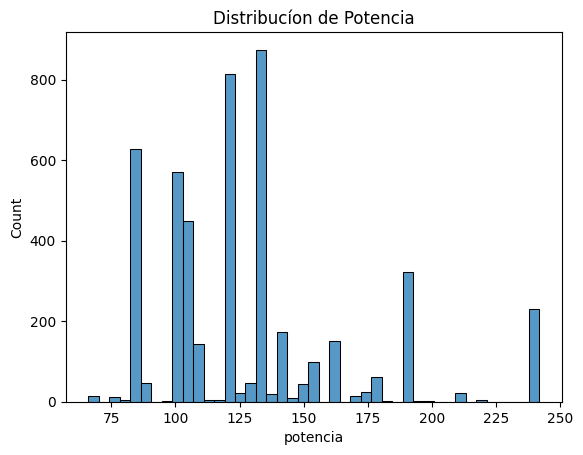

In [178]:
sns.histplot(x=df_bmw_nn_7['potencia'])
plt.title('Distribucíon de Potencia')
plt.show()

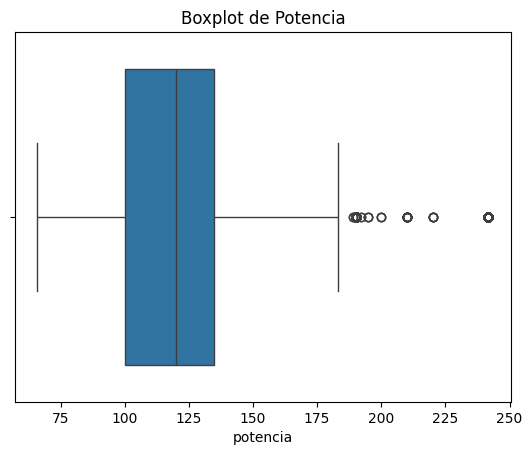

In [179]:
sns.boxplot(x=df_bmw_nn_7['potencia'])
plt.title('Boxplot de Potencia')
plt.show()

#### **Kilometraje**

<Axes: xlabel='km'>

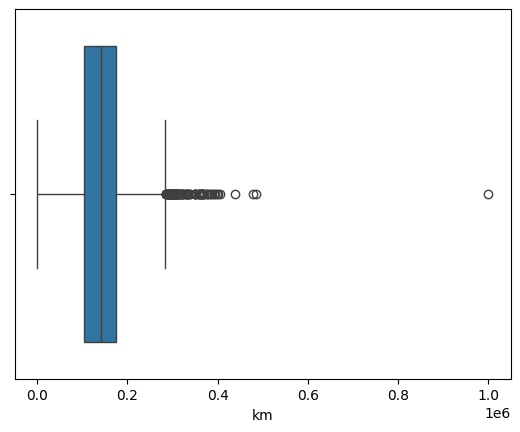

In [180]:
sns.boxplot(data= df_bmw_nn_7, x= 'km')

In [181]:
df_bmw_nn_7['km'].describe()

count    4.818000e+03
mean     1.409155e+05
std      6.013901e+04
min      4.760000e+02
25%      1.028630e+05
50%      1.410270e+05
75%      1.752062e+05
max      1.000376e+06
Name: km, dtype: float64

Se realiza un tratado de outliers a partir de la definición del IQR según la distribución de los datos y la tolerancia a definir para estos outliers.

In [182]:
df_bmw_nn_8 = df_bmw_nn_7.copy()

In [183]:
df_bmw_nn_8['km'].quantile(0.1)

np.float64(65001.1)

In [184]:
len(df_bmw_nn_8[df_bmw_nn_8['km'] < df_bmw_nn_8['km'].quantile(0.1)]) # Cantidad de registros con km menor al percentil 10%

482

In [185]:
df_bmw_nn_8['km'].quantile(0.9)

np.float64(205062.1)

In [186]:
len(df_bmw_nn_8[df_bmw_nn_8['km'] > df_bmw_nn_8['km'].quantile(0.9)]) # Cantidad de registros con km mayor al percentil 90%

482

In [187]:
Q1= df_bmw_nn_8['km'].quantile(0.1)

Q3= df_bmw_nn_8['km'].quantile(0.9)

IQR= Q3-Q1

indexes_low = df_bmw_nn_8[df_bmw_nn_8['km']<(Q1-1.5*IQR)].index
indexes_high= df_bmw_nn_8[df_bmw_nn_8['km']>(Q3+1.5*IQR)].index

In [188]:
Q1

np.float64(65001.1)

In [189]:
Q3

np.float64(205062.1)

In [190]:
IQR

np.float64(140061.0)

In [191]:
Q1-(1.5*IQR)

np.float64(-145090.4)

In [192]:
Q3+(1.5*IQR)

np.float64(415153.6)

In [193]:
df_bmw_nn_8['km'].nunique()

4761

In [194]:
len(indexes_high)/len(df_bmw_8)*100

0.08300477277443453

Para la **normalización de los outliers** se tomaron los siguientes criterios:

- Al realizar un boxplot **no vemos ningún posible outlier en el límite inferior.** Aún así realizamos un
  **.describe()**, para ver el **valor mínimo** y nos parece que se encuentra dentro de una posible normalidad, por ello, se decide no modificar el límite inferior.

- Para  los **valores que superaban el límite superior**, se calculó **Q3+ 1.5*IQR** que derivó en el **resultado de 415.153.6 km**. Se vio que los valores por encima de este umbral consideraban el **0,083% del dataset total**, por ello decidimos mantener ese umbral ya que nos parecio que se encuentra denro de la normalidad y modificar los valores superiores a ese umbral com el valor máx inferior a ese umbral **405.816.0 km**

In [195]:
max_km= df_bmw_nn_8[df_bmw_nn_8['km']<(Q3+1.5*IQR)]['km'].max()

In [196]:
max_km

405816.0

In [197]:
df_bmw_nn_8.loc[indexes_high,'km']= max_km

<Axes: xlabel='km'>

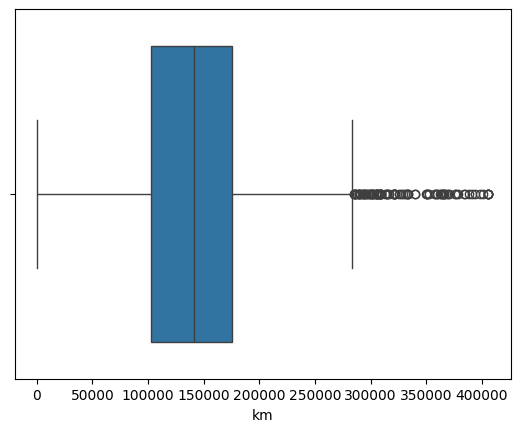

In [198]:
sns.boxplot(data= df_bmw_nn_8, x= 'km')

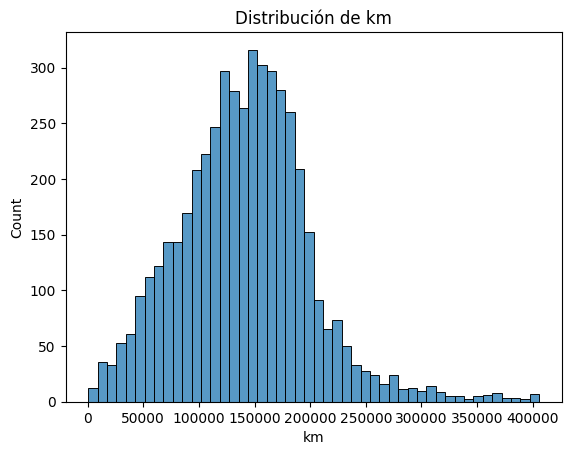

In [199]:
sns.histplot(x=df_bmw_nn_8['km'])
plt.title('Distribución de km')
plt.show()

#### **Precio**

<Axes: xlabel='precio'>

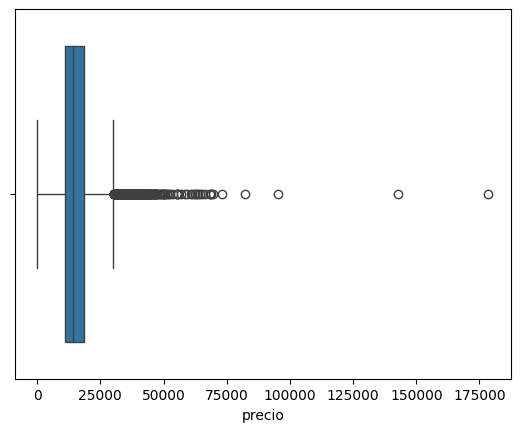

In [200]:
sns.boxplot(data=df_bmw_nn_8, x= 'precio')

<Axes: xlabel='precio', ylabel='Count'>

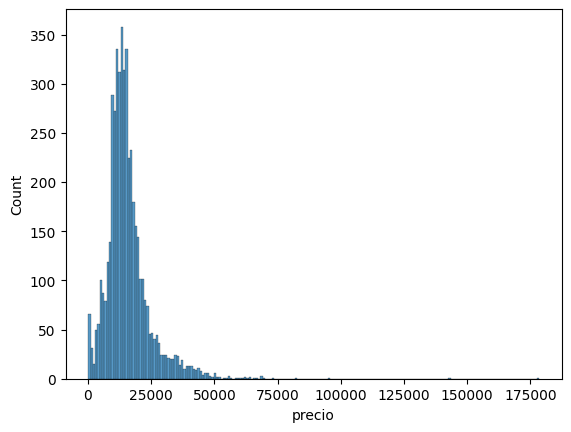

In [201]:
sns.histplot(data= df_bmw_nn_8, x= 'precio')

In [202]:
df_bmw_nn_8['precio'].describe()

count      4818.000000
mean      15826.670818
std        9186.483816
min         100.000000
25%       10825.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

Observamos una **distribución muy dispersa** desde el valor mínimo al máximo, con una **cola muy larga hacia la derecha**. Además, tanto en el **límite inferior** como en el **límite superior**, se sospecha la existencia de  **potenciales outliers**.

Procedemos a crear una **nueva variable log_precio**, siendo esta la variable precio a escala logarítmica.  Así comprimiremos la cola larga y **reduciremos la asimetría** para un modelo más robusto.

La variable **log_precio**, será la que utilizaremos para **entrenar el modelo**. Y **una vez tengamos la predicción**, la **transformaremos de nuevo a escala normal** para obtener los valores reales predichos.

La **variable precio**, **NO** la usaremos para **entrenar el modelo**, pero la mantendremos como **variable auxliar** para poder **comparar los valores predichos (a escala normal) con los valores reales**.


In [203]:
df_bmw_nn_9 = df_bmw_nn_8.copy()

In [204]:
df_bmw_nn_9['log_precio']= np.log10(df_bmw_nn_9['precio'])

<Axes: xlabel='log_precio', ylabel='Count'>

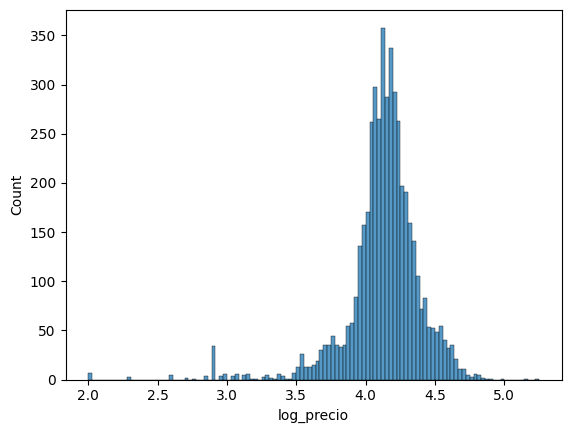

In [205]:
sns.histplot(data= df_bmw_nn_9, x= 'log_precio')

<Axes: xlabel='log_precio'>

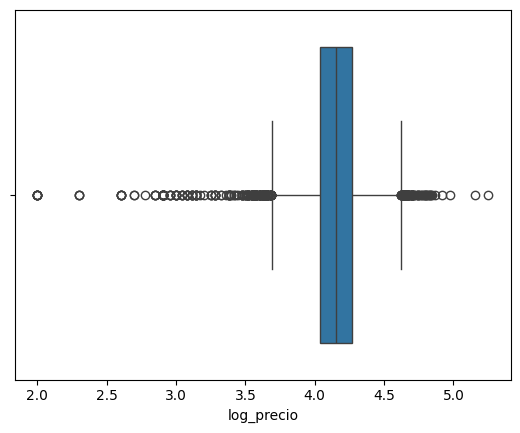

In [206]:
sns.boxplot(data=df_bmw_nn_9, x= 'log_precio')

In [207]:
Q1= df_bmw_nn_9['log_precio'].quantile(0.25)

Q3= df_bmw_nn_9['log_precio'].quantile(0.75)

IQR= Q3-Q1

indexes_low = df_bmw_nn_9[df_bmw_nn_9['log_precio']<(Q1-1.5*IQR)].index
indexes_high= df_bmw_nn_9[df_bmw_nn_9['log_precio']>(Q3+1.5*IQR)].index

In [208]:
Q1

np.float64(4.034424441100368)

In [209]:
Q3

np.float64(4.269512944217916)

In [210]:
IQR

np.float64(0.2350885031175478)

In [211]:
Q1-(1.5*IQR)

np.float64(3.6817916864240465)

In [212]:
Q3+(1.5*IQR)

np.float64(4.622145698894238)

In [213]:
max_precio_l= df_bmw_nn_9[df_bmw_nn_9['log_precio']<(Q3+1.5*IQR)]['log_precio'].max()

In [214]:
max_precio_l

4.619093330626742

In [215]:
min_precio_l= df_bmw_nn_9[df_bmw_nn_9['log_precio']>(Q1-1.5*IQR)]['log_precio'].min()

In [216]:
min_precio_l

3.690196080028514

In [217]:
df_bmw_nn_9.loc[indexes_low,'log_precio']= min_precio_l

In [218]:
df_bmw_nn_9.loc[indexes_high,'log_precio']= max_precio_l

<Axes: xlabel='log_precio'>

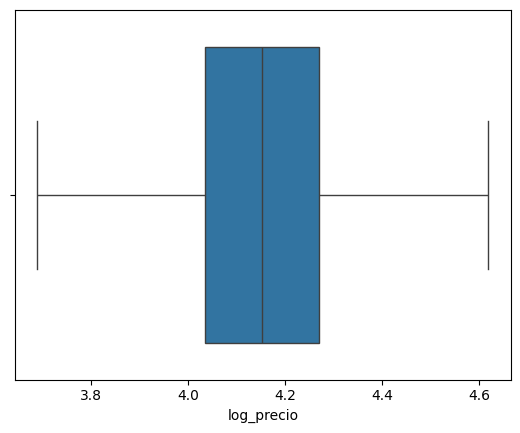

In [219]:
sns.boxplot(data= df_bmw_nn_9, x= 'log_precio')

In [220]:
indexes_low.nunique()

232

In [221]:
indexes_high.nunique()

91

<Axes: xlabel='log_precio', ylabel='Count'>

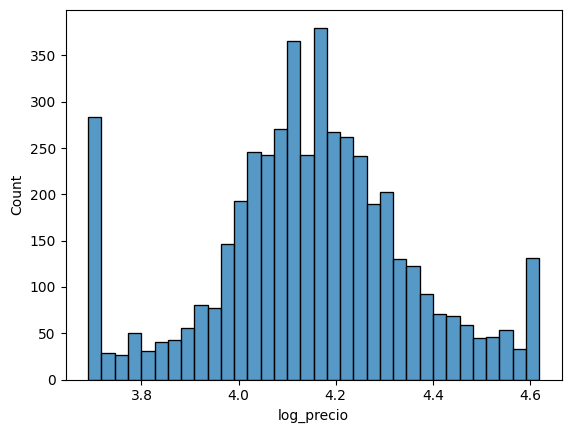

In [222]:
sns.histplot(data= df_bmw_nn_9, x= 'log_precio')

 **(OPCIONAL)** Hago una **copia del df** para transformar la variable log_precio a escala normal y  **visualizar su distribución**.

In [223]:
df_bmw_nn_10= df_bmw_nn_9.copy()

In [224]:
df_bmw_nn_10['precio_nuevo'] = 10**(df_bmw_nn_10['log_precio'])

<Axes: xlabel='precio_nuevo'>

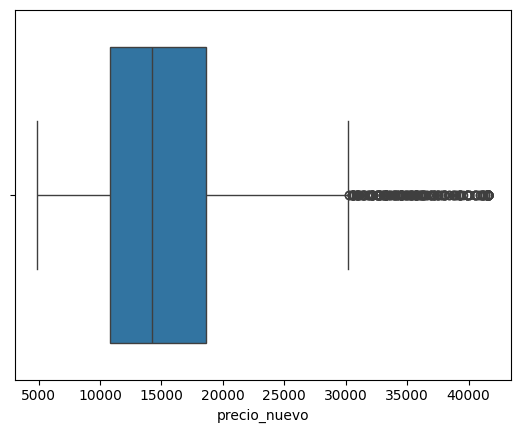

In [225]:
sns.boxplot(data= df_bmw_nn_10, x= 'precio_nuevo')

<Axes: xlabel='precio_nuevo', ylabel='Count'>

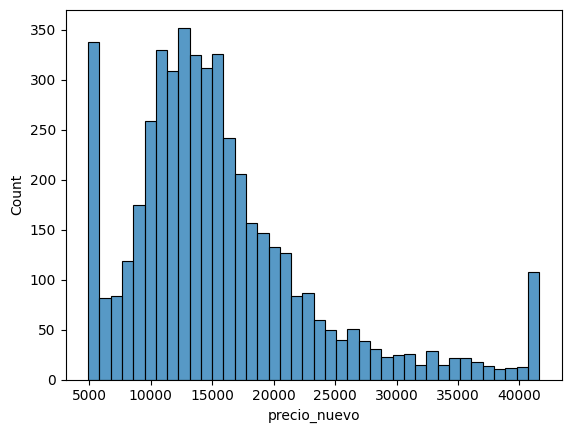

In [226]:
sns.histplot(data= df_bmw_nn_10, x= 'precio_nuevo')

In [227]:
df_bmw_nn_10['precio_nuevo'].describe()

count     4818.000000
mean     15720.153591
std       7806.676918
min       4900.000000
25%      10825.000000
50%      14200.000000
75%      18600.000000
max      41600.000000
Name: precio_nuevo, dtype: float64

Vemos que la distribución se ha normalizado. **Nos quedaremos con log_precio para crear el modelo.**

**NOTA:**

- **Creamos un nuevo df (df_bmw_nn_no)** en la que eliminaremos la  variable 'precio' para seguir construyendo el modelo con 'log_precio'.

- Mantendremos  **df_bmw_nn_8** para poder comparar las predicciones.

- **df_bmw_nn_10** se ha creado para visualizar la transformación de datos a escala real.

In [228]:
df_bmw_nn_no= df_bmw_nn_9.copy()

In [229]:
df_bmw_nn_no.drop(columns= 'precio', axis=1, inplace= True)

In [230]:
df_bmw_nn_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4818 entries, 0 to 4818
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   modelo                4818 non-null   object  
 1   km                    4818 non-null   float64 
 2   potencia              4818 non-null   float64 
 3   color                 4818 non-null   object  
 4   tipo_coche            4818 non-null   object  
 5   volante_regulable     4818 non-null   object  
 6   aire_acondicionado    4818 non-null   bool    
 7   camara_trasera        4818 non-null   object  
 8   elevalunas_electrico  4818 non-null   object  
 9   bluetooth             4818 non-null   bool    
 10  alerta_lim_velocidad  4818 non-null   bool    
 11  antigüedad            4818 non-null   category
 12  km_rango              4818 non-null   category
 13  log_precio            4818 non-null   float64 
dtypes: bool(3), category(2), float64(3), object(6)
memory usage: 

## **0.4 Correlación**

In [231]:
corr= df_bmw_nn_no.corr(numeric_only= True)

In [232]:
corr.style.background_gradient(cmap= 'coolwarm')

Observamos que las variables que tienen más impacto con la variable log_precio son **potencia** (0,61), **alerta_lim_velocidad**(0,50) de forma positiva, y, **km**(-0,45) de forma negativa.

## **0.5 Variables VS Target**

- Definir variable target.
- Comparar variabes numéricas con target (scatterplot, scatterplot agrupado)
- Comparar variables categóricas con target (boxplot /violinplot por categorias)

In [233]:
df_bmw_nn_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4818 entries, 0 to 4818
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   modelo                4818 non-null   object  
 1   km                    4818 non-null   float64 
 2   potencia              4818 non-null   float64 
 3   color                 4818 non-null   object  
 4   tipo_coche            4818 non-null   object  
 5   volante_regulable     4818 non-null   object  
 6   aire_acondicionado    4818 non-null   bool    
 7   camara_trasera        4818 non-null   object  
 8   elevalunas_electrico  4818 non-null   object  
 9   bluetooth             4818 non-null   bool    
 10  alerta_lim_velocidad  4818 non-null   bool    
 11  antigüedad            4818 non-null   category
 12  km_rango              4818 non-null   category
 13  log_precio            4818 non-null   float64 
dtypes: bool(3), category(2), float64(3), object(6)
memory usage: 

In [234]:
target = ['log_precio']

In [235]:
def obtener_lista_variable(dataset):
  lista_numericas = []
  lista_boolen=[]
  lista_categoricas = []



  for column in dataset.columns:
    if (dataset[column].dtype.kind=='b' or dataset[column].dtype.kind == 'O') and len(dataset[column].unique())==2 and column not in target:
      lista_boolen.append(column)
    elif (dataset[column].dtype.kind == 'i' or dataset[column].dtype.kind=='f') and len(dataset[column].unique())!=2 and column not in target:
      lista_numericas.append(column)
    elif dataset[column].dtype.kind == 'O' and column not in target:
      lista_categoricas.append(column)


  return lista_numericas, lista_boolen, lista_categoricas

In [236]:
lista_numericas, lista_boolen, lista_categoricas = obtener_lista_variable(df_bmw_nn_no)

In [237]:
lista_numericas

['km', 'potencia']

In [238]:
lista_boolen

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [239]:
lista_categoricas

['modelo', 'color', 'tipo_coche', 'antigüedad', 'km_rango']

### **Variables categóricas y variables booleanas**

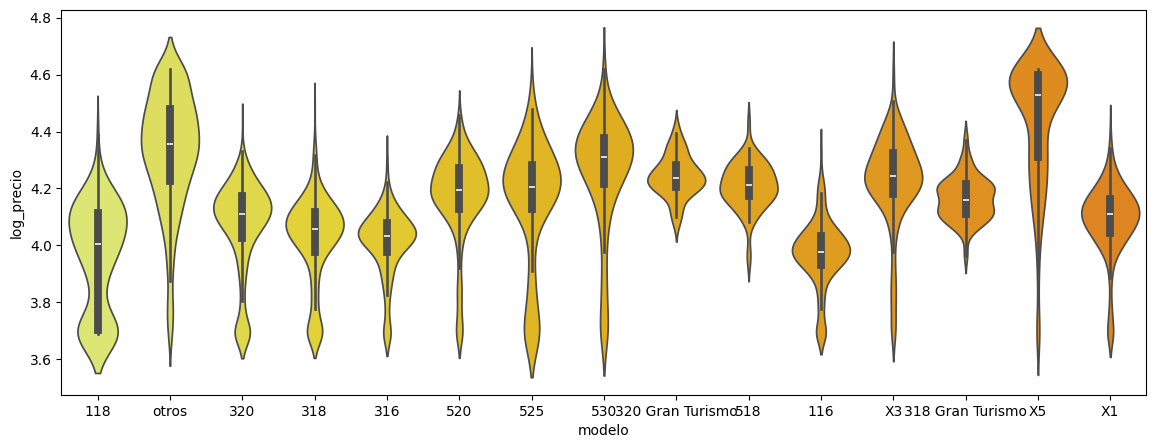

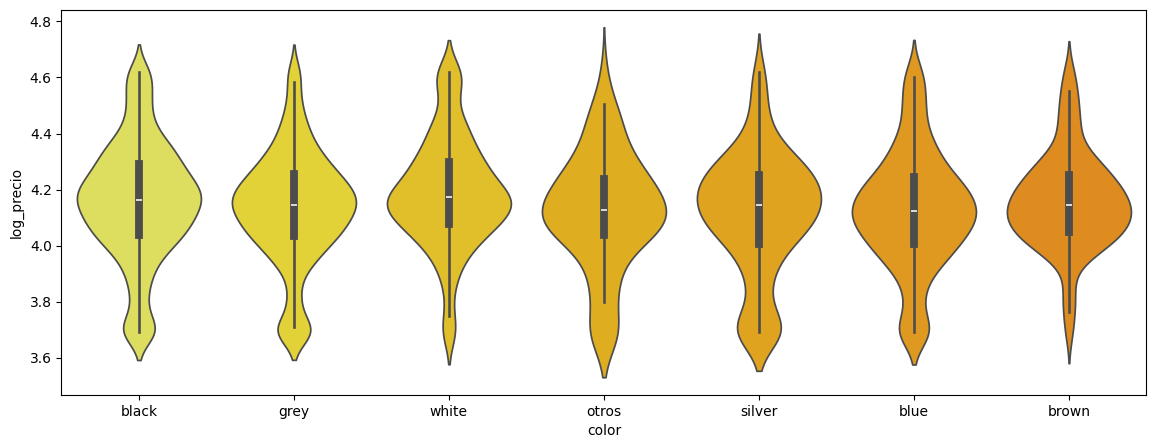

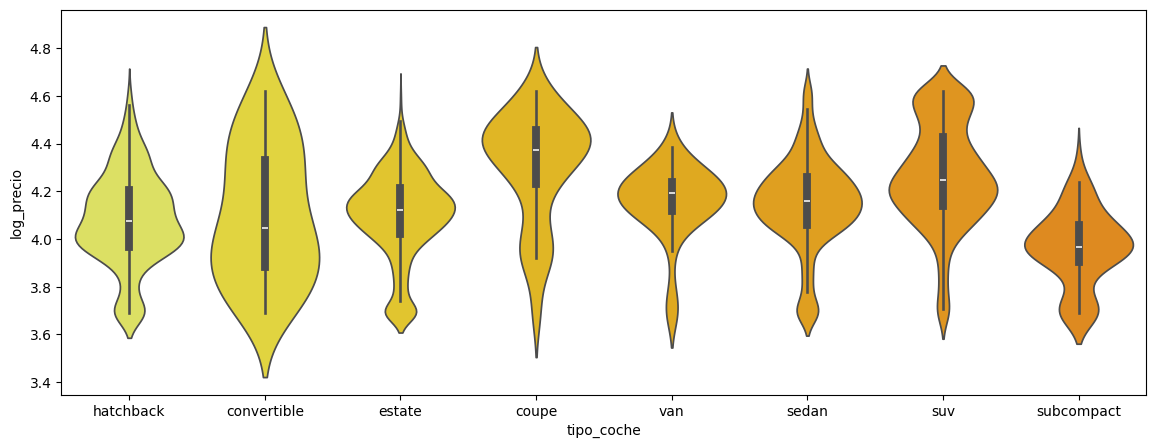

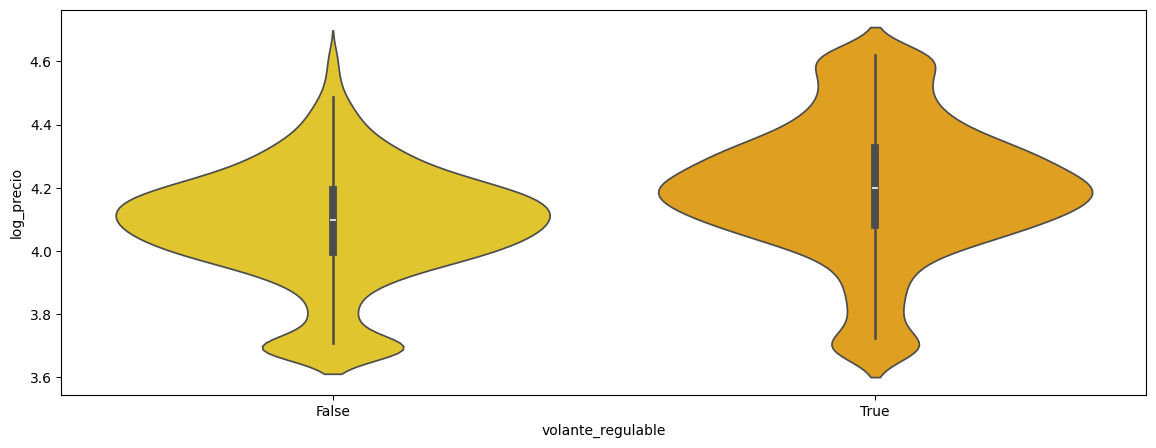

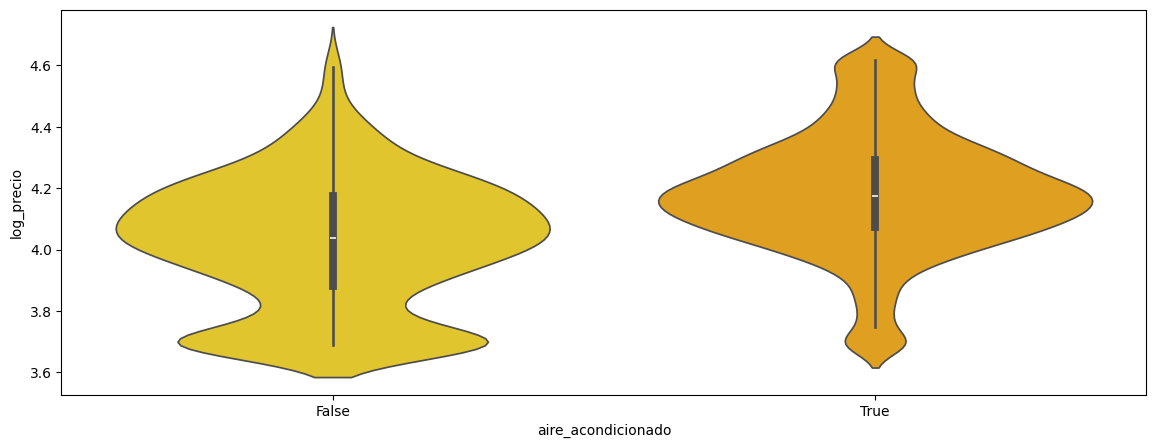

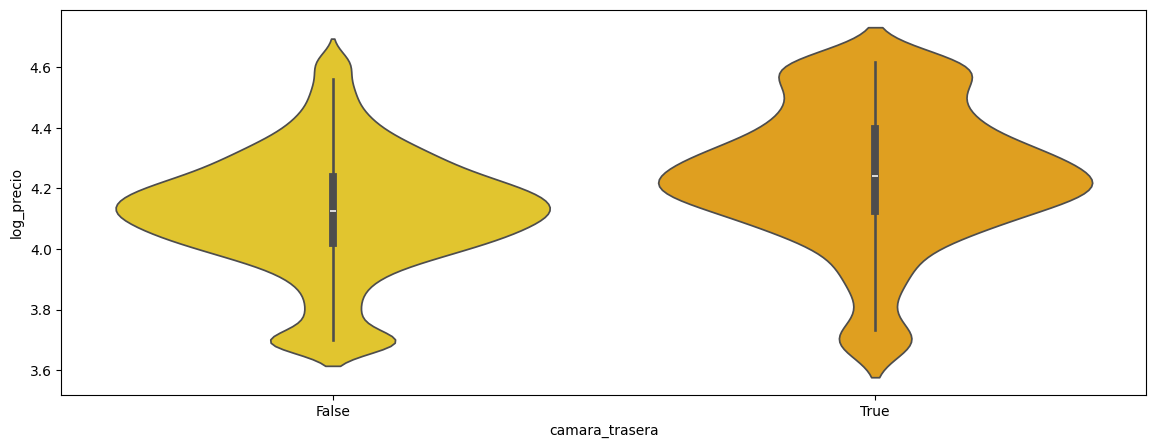

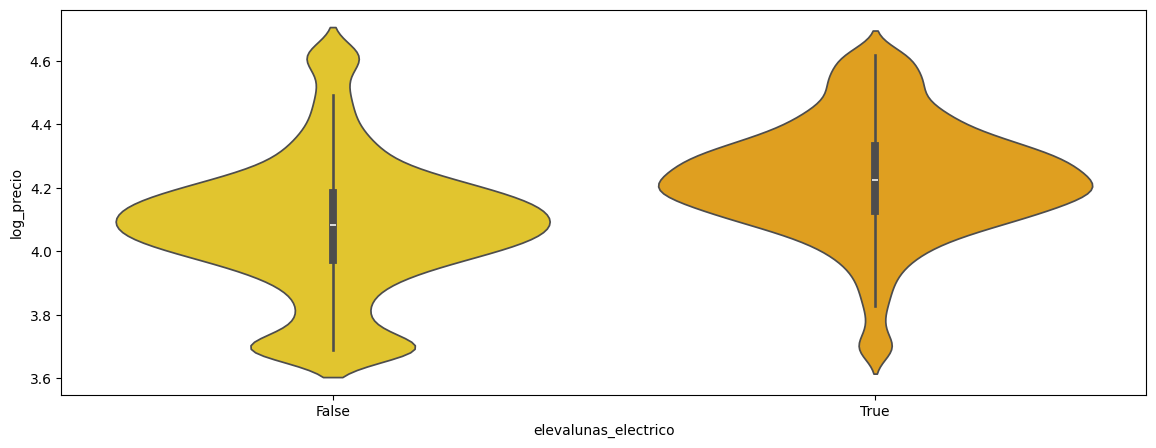

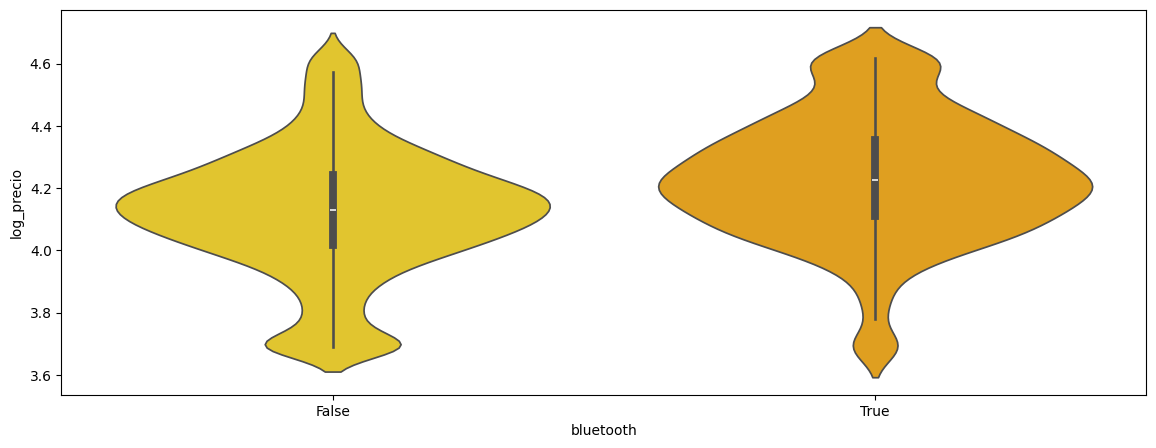

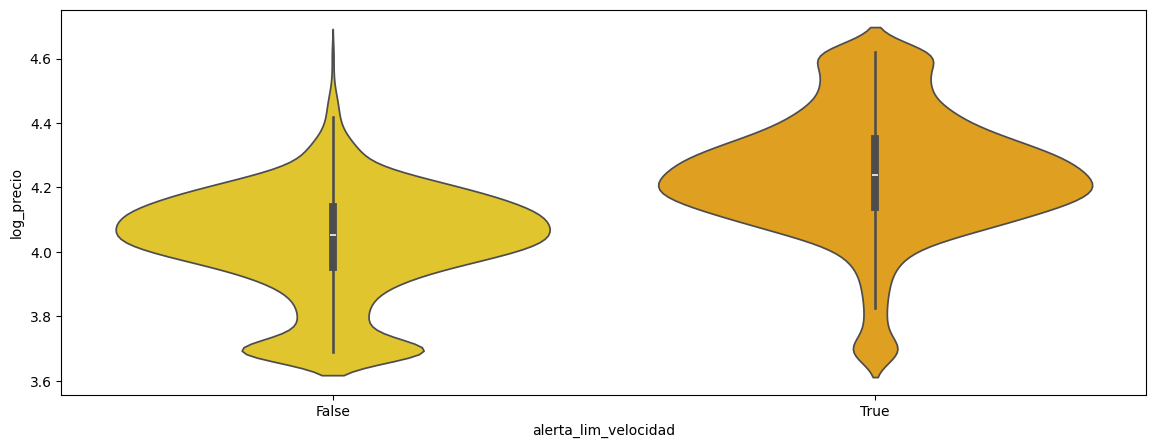

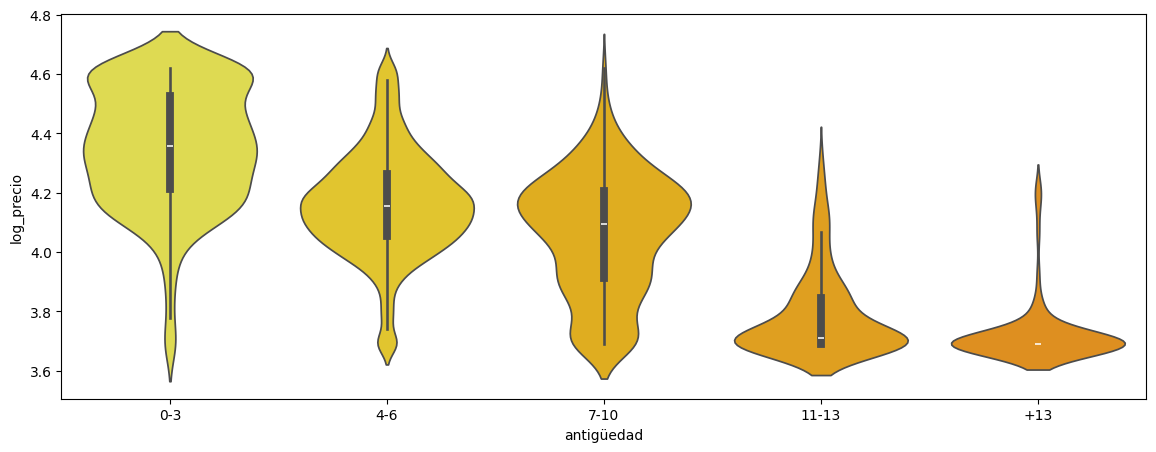

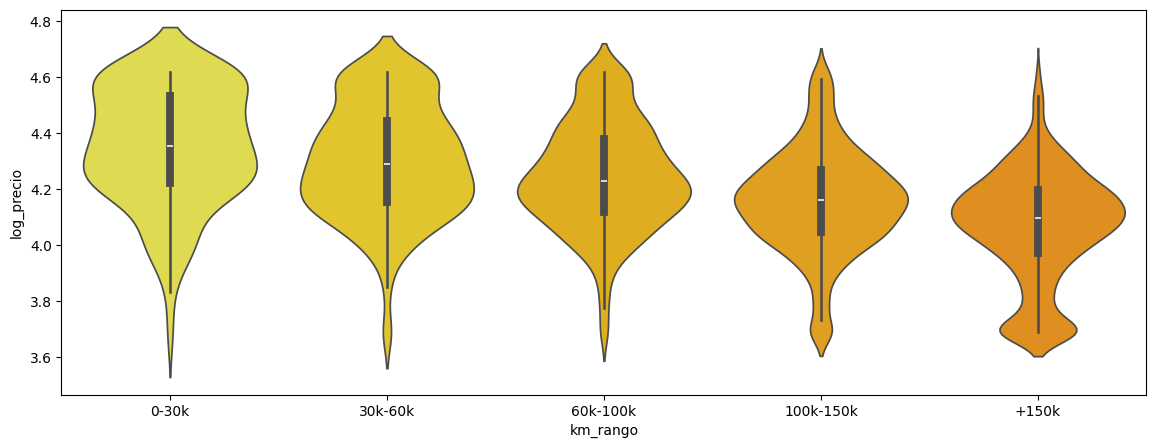

In [240]:
for i in df_bmw_nn_no:
  if i in lista_categoricas or i in lista_boolen:
    plt.figure(figsize=(14,5))
    sns.violinplot(x=i, y='log_precio', data = df_bmw_nn_no, palette= 'Wistia')

#### **Insights variables categóricas y *booleanas*:**

- **variables booleanas**: Por norma general en estas variables con dos tipos de respuesta (True/False), las categorías *True* tienen una mediana de los valores más elevada que en la categoría *False*.  Lo cual tiene un sentido ya que la categoría *True* indica que el coche contiene elementos extras.
- **antigüedad y rango_km** : En estas dos variables encontramos una correlación negativa en el sentido que a mayor antigüedad o rango_km el precio disminuye.

Por otro lado, la variable **modelo** podemos destacar un modelo con la mediana más elevada que el resto (X5) y que la categoria **otros** esta más distribuida a lo largo del log_ precio ya que engloba distintos modelos con distintas características.

Por último, la variable **tipo_coche**, la categoria convertible está más distribuida a lo largo de log_precio, indicando que presenta variedad de precios.


### **Variables numéricas**

#### **km**

<Axes: xlabel='km', ylabel='log_precio'>

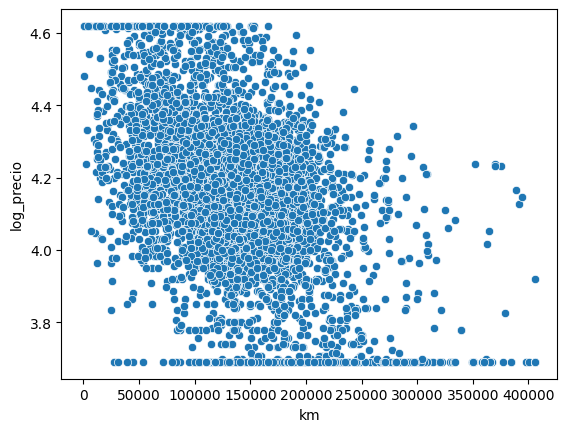

In [241]:
sns.scatterplot(x= 'km',  y = 'log_precio', data= df_bmw_nn_no)

In [242]:
variable_hue = lista_boolen+ lista_categoricas
for v in variable_hue:
  plt.figure()
  sns.scatterplot(x= 'km',  y = 'log_precio', hue= v,  data= df_bmw_nn_no)
  plt.title(f'Distribucion de km y log_precio agrupada {v}')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### **potencia**

<Axes: xlabel='potencia', ylabel='log_precio'>

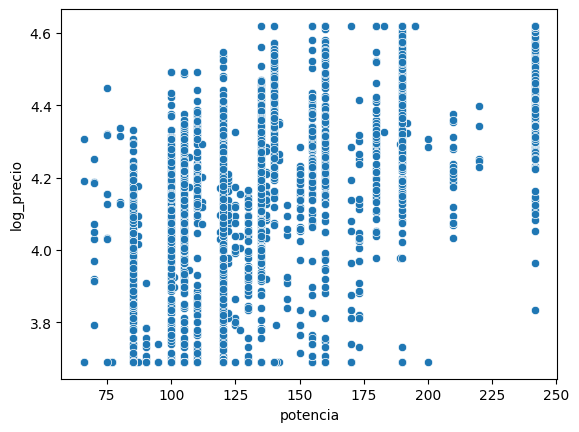

In [243]:
sns.scatterplot(x= 'potencia',  y = 'log_precio', data= df_bmw_nn_no)

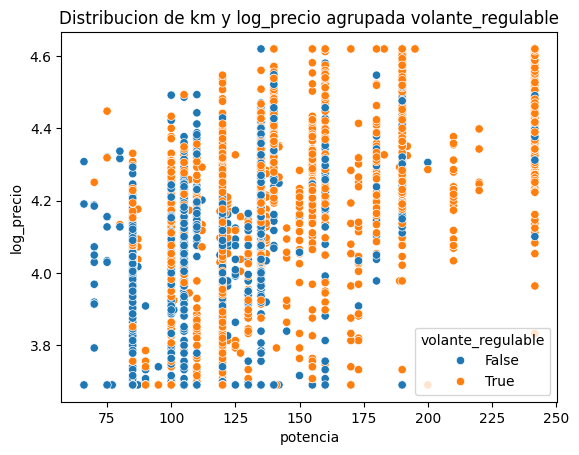

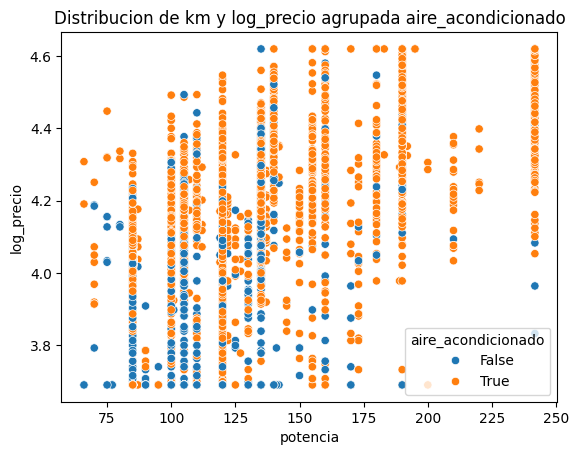

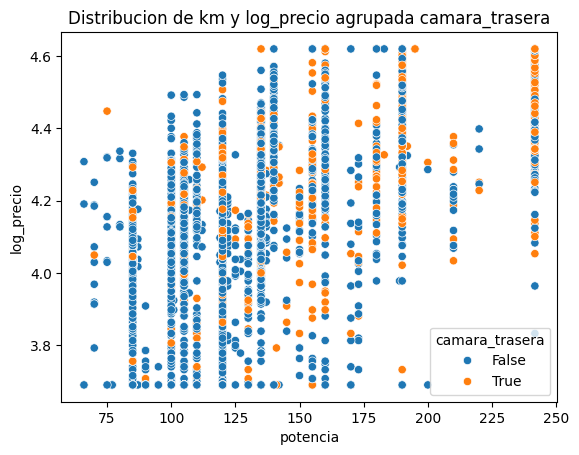

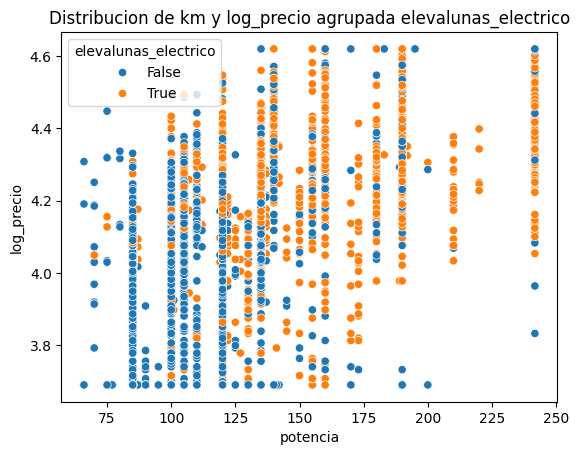

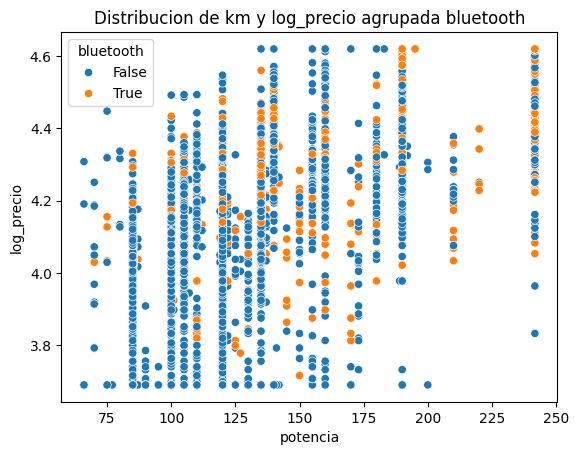

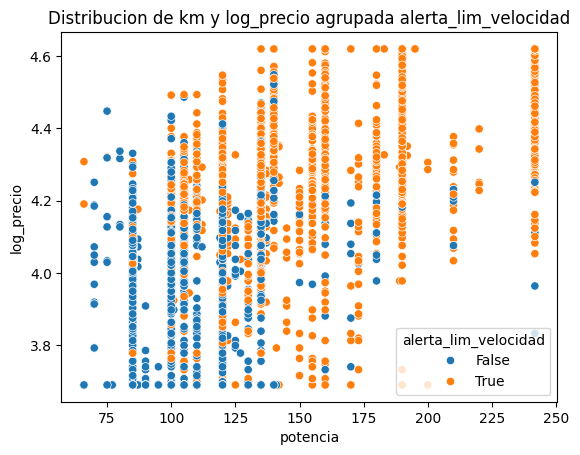

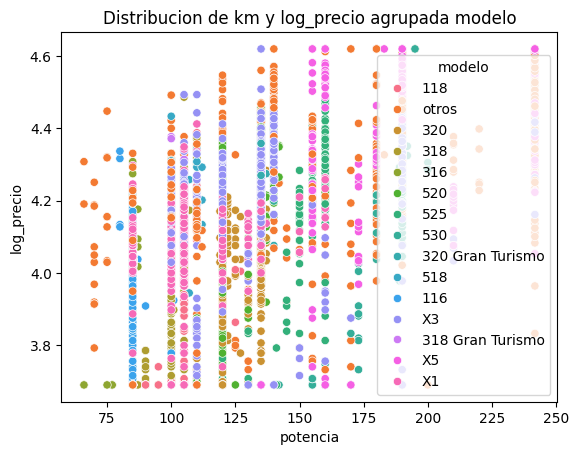

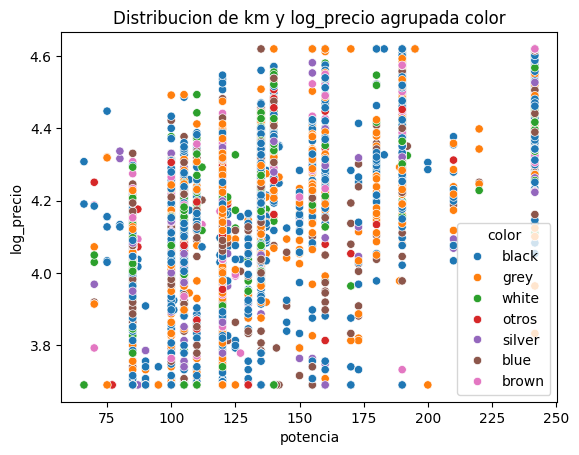

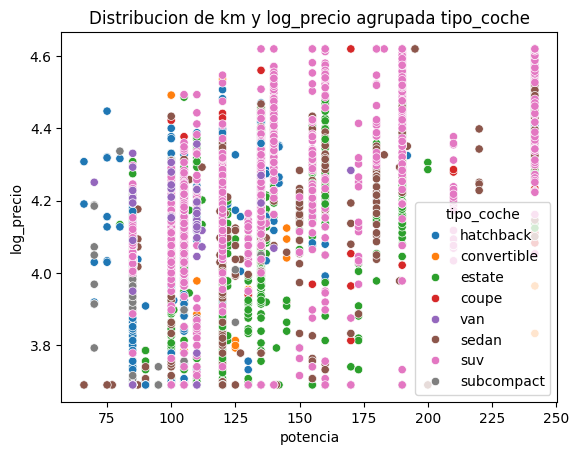

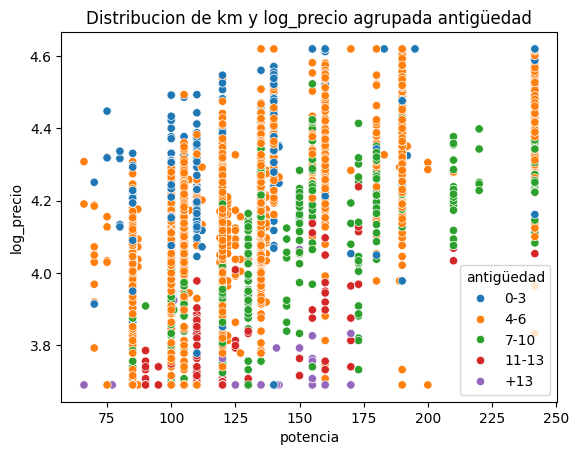

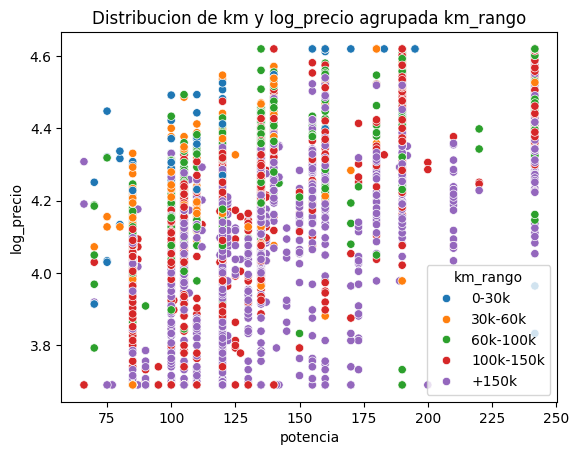

In [244]:
variable_hue = lista_boolen+ lista_categoricas
for v in variable_hue:
  plt.figure()
  sns.scatterplot(x= 'potencia',  y = 'log_precio', hue= v,  data= df_bmw_nn_no)
  plt.title(f'Distribucion de km y log_precio agrupada {v}')
  plt.show()

<Axes: xlabel='potencia', ylabel='log_precio'>

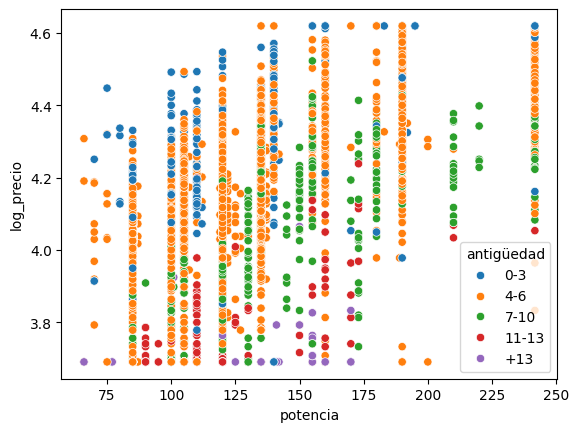

In [245]:
sns.scatterplot(x= 'potencia',  y = 'log_precio', hue= 'antigüedad', data= df_bmw_nn_no)

<Axes: xlabel='potencia', ylabel='log_precio'>

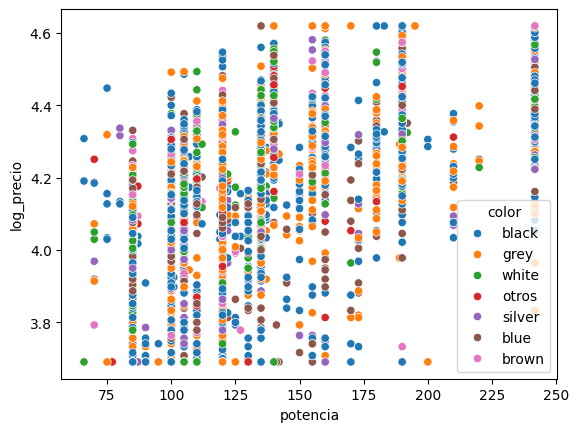

In [246]:
sns.scatterplot(x= 'potencia',  y = 'log_precio', hue= 'color', data= df_bmw_nn_no)

#### **Insights variables numéricas:**
-  **potencia**: Si analizamos las variables numéricas con log_precio agrupada por subcategorias de variables categóricas observamos que la variable **alerta_lim_velocidad** esta relacionada con **potencia**. A mayor potencia más valores True de alerta_lim_velocidad.

# **Procesamiento**

Primero, **transformamos** las variables booleanas a numéricas.

In [247]:
lista_boolen

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [248]:
# Transdformar bool a int.
df_bmw_nn_no[lista_boolen]= df_bmw_nn_no[lista_boolen].astype(int)

In [249]:
df_bmw_nn_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4818 entries, 0 to 4818
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   modelo                4818 non-null   object  
 1   km                    4818 non-null   float64 
 2   potencia              4818 non-null   float64 
 3   color                 4818 non-null   object  
 4   tipo_coche            4818 non-null   object  
 5   volante_regulable     4818 non-null   int64   
 6   aire_acondicionado    4818 non-null   int64   
 7   camara_trasera        4818 non-null   int64   
 8   elevalunas_electrico  4818 non-null   int64   
 9   bluetooth             4818 non-null   int64   
 10  alerta_lim_velocidad  4818 non-null   int64   
 11  antigüedad            4818 non-null   category
 12  km_rango              4818 non-null   category
 13  log_precio            4818 non-null   float64 
dtypes: category(2), float64(3), int64(6), object(3)
memory usage:

**Transformación de variables categóricas a numéricas**

Usamos dos métodos distintos.

Por un lado para las variables **antigüedad** y **km_rango** usamos el método** Ordinal Encoder**, ya que sus categorías tienen orden lógico significativo que queremos respetar.

Por otro lado para el **resto de variables categóricas** usamos **One Hot Encoder**, ya que sus categorias no tienen un orden lógico y le damos la misma importáncia a cada una de ellas.

### **Ordinal Encoder (antigüedad, km_rango)**

In [250]:
df_bmw_nn_no_p= df_bmw_nn_no.copy()

In [251]:
df_bmw_nn_no_p['antigüedad'].unique()

['4-6', '0-3', '7-10', '11-13', '+13']
Categories (5, object): ['0-3' < '4-6' < '7-10' < '11-13' < '+13']

In [252]:
df_bmw_nn_no_p['km_rango'].unique()

['100k-150k', '0-30k', '+150k', '60k-100k', '30k-60k']
Categories (5, object): ['0-30k' < '30k-60k' < '60k-100k' < '100k-150k' < '+150k']

In [253]:
# Transformación de ordinales
col_ordinales = ['antigüedad', 'km_rango']
X_ordinal = df_bmw_nn_no_p[col_ordinales]
# 1. Crear y entrenar el encoder (solo una vez con los datos de entrenamiento)
oe= OrdinalEncoder( categories=[
    ['0-3','4-6','7-10','11-13','+13'],
    ['0-30k','30k-60k','60k-100k','100k-150k','+150k']
])
X_ordinal_encoded = oe.fit_transform(X_ordinal)

# 2. Remplazar las columnas originales
df_bmw_nn_no_p[col_ordinales] = X_ordinal_encoded

In [254]:
df_bmw_nn_no_p.head()

modelo        km    potencia   color   tipo_coche  volante_regulable  \
0    118  140411.0  100.000000   black    hatchback                  1   
1  otros   13929.0  241.717391    grey  convertible                  1   
2    320  183297.0  120.000000   white       estate                  0   
3  otros  128035.0  135.000000   otros  convertible                  1   
4  otros   97097.0  160.000000  silver        coupe                  1   

   aire_acondicionado  camara_trasera  elevalunas_electrico  bluetooth  \
0                   1               0                     1          1   
1                   1               0                     0          1   
2                   0               0                     1          0   
3                   1               0                     1          1   
4                   1               0                     0          1   

   alerta_lim_velocidad  antigüedad  km_rango  log_precio  
0                     0         1.0       3.0    4.053078  
1                     1         0.0       0.0    4.619093  
2                     0         1.0       4.0    4.008600  
3                     1         1.0       3.0    4.399674  
4                     1         1.0       2.0    4.523746

In [255]:
df_bmw_nn_no.head()

modelo        km    potencia   color   tipo_coche  volante_regulable  \
0    118  140411.0  100.000000   black    hatchback                  1   
1  otros   13929.0  241.717391    grey  convertible                  1   
2    320  183297.0  120.000000   white       estate                  0   
3  otros  128035.0  135.000000   otros  convertible                  1   
4  otros   97097.0  160.000000  silver        coupe                  1   

   aire_acondicionado  camara_trasera  elevalunas_electrico  bluetooth  \
0                   1               0                     1          1   
1                   1               0                     0          1   
2                   0               0                     1          0   
3                   1               0                     1          1   
4                   1               0                     0          1   

   alerta_lim_velocidad antigüedad   km_rango  log_precio  
0                     0        4-6  100k-150k    4.053078  
1                     1        0-3      0-30k    4.619093  
2                     0        4-6      +150k    4.008600  
3                     1        4-6  100k-150k    4.399674  
4                     1        4-6   60k-100k    4.523746

Comprobamos que las transformaciones se ha ejecutado correctamente.

In [256]:
df_bmw_nn_no_p['antigüedad'].unique()

array([1., 0., 2., 3., 4.])

In [257]:
df_bmw_nn_no['antigüedad'].unique()

['4-6', '0-3', '7-10', '11-13', '+13']
Categories (5, object): ['0-3' < '4-6' < '7-10' < '11-13' < '+13']

In [258]:
df_bmw_nn_no_p['km_rango'].unique()

array([3., 0., 4., 2., 1.])

In [259]:
df_bmw_nn_no['km_rango'].unique()

['100k-150k', '0-30k', '+150k', '60k-100k', '30k-60k']
Categories (5, object): ['0-30k' < '30k-60k' < '60k-100k' < '100k-150k' < '+150k']

### **One Hot Encoder (variables categóricas)**

In [260]:
df_bmw_nn_no_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4818 entries, 0 to 4818
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4818 non-null   object 
 1   km                    4818 non-null   float64
 2   potencia              4818 non-null   float64
 3   color                 4818 non-null   object 
 4   tipo_coche            4818 non-null   object 
 5   volante_regulable     4818 non-null   int64  
 6   aire_acondicionado    4818 non-null   int64  
 7   camara_trasera        4818 non-null   int64  
 8   elevalunas_electrico  4818 non-null   int64  
 9   bluetooth             4818 non-null   int64  
 10  alerta_lim_velocidad  4818 non-null   int64  
 11  antigüedad            4818 non-null   float64
 12  km_rango              4818 non-null   float64
 13  log_precio            4818 non-null   float64
dtypes: float64(5), int64(6), object(3)
memory usage: 693.6+ KB


In [261]:
lista_numericas, lista_boolen, lista_categoricas= obtener_lista_variable(df_bmw_nn_no_p)

In [262]:
lista_categoricas

['modelo', 'color', 'tipo_coche']

In [263]:
# Transformación categórica
# 1. Separamos las variables a transformar
col_categoricas = lista_categoricas
X_categoricas = df_bmw_nn_no_p[col_categoricas]
# 2. Crear y entrenar el encoder (solo una vez con los datos de entrenamiento)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int)
X_categorico_encoded = encoder.fit_transform(X_categoricas)

# 3. Concatenar las variables transformadas
categorical_feature_names = encoder.get_feature_names_out(col_categoricas)
df_categorico_encoded = pd.DataFrame(X_categorico_encoded, columns=categorical_feature_names, index=df_bmw_nn_no_p.index)

df_bmw_prep = pd.concat([df_bmw_nn_no_p,df_categorico_encoded], axis=1).drop(columns=col_categoricas)

In [264]:
pd.set_option('display.max_columns', None)

In [265]:
df_bmw_prep.head()

km    potencia  volante_regulable  aire_acondicionado  \
0  140411.0  100.000000                  1                   1   
1   13929.0  241.717391                  1                   1   
2  183297.0  120.000000                  0                   0   
3  128035.0  135.000000                  1                   1   
4   97097.0  160.000000                  1                   1   

   camara_trasera  elevalunas_electrico  bluetooth  alerta_lim_velocidad  \
0               0                     1          1                     0   
1               0                     0          1                     1   
2               0                     1          0                     0   
3               0                     1          1                     1   
4               0                     0          1                     1   

   antigüedad  km_rango  log_precio  modelo_116  modelo_118  modelo_316  \
0         1.0       3.0    4.053078           0           1           0   
1         0.0       0.0    4.619093           0           0           0   
2         1.0       4.0    4.008600           0           0           0   
3         1.0       3.0    4.399674           0           0           0   
4         1.0       2.0    4.523746           0           0           0   

   modelo_318  modelo_318 Gran Turismo  modelo_320  modelo_320 Gran Turismo  \
0           0                        0           0                        0   
1           0                        0           0                        0   
2           0                        0           1                        0   
3           0                        0           0                        0   
4           0                        0           0                        0   

   modelo_518  modelo_520  modelo_525  modelo_530  modelo_X1  modelo_X3  \
0           0           0           0           0          0          0   
1           0           0           0           0          0          0   
2           0           0           0           0          0          0   
3           0           0           0           0          0          0   
4           0           0           0           0          0          0   

   modelo_X5  modelo_otros  color_black  color_blue  color_brown  color_grey  \
0          0             0            1           0            0           0   
1          0             1            0           0            0           1   
2          0             0            0           0            0           0   
3          0             1            0           0            0           0   
4          0             1            0           0            0           0   

   color_otros  color_silver  color_white  tipo_coche_convertible  \
0            0             0            0                       0   
1            0             0            0                       1   
2            0             0            1                       0   
3            1             0            0                       1   
4            0             1            0                       0   

   tipo_coche_coupe  tipo_coche_estate  tipo_coche_hatchback  \
0                 0                  0                     1   
1                 0                  0                     0   
2                 0                  1                     0   
3                 0                  0                     0   
4                 1                  0                     0   

   tipo_coche_sedan  tipo_coche_subcompact  tipo_coche_suv  tipo_coche_van  
0                 0                      0               0               0  
1                 0                      0               0               0  
2                 0                      0               0               0  
3                 0                      0               0               0  
4                 0                      0               0               0

In [266]:
df_bmw_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4818 entries, 0 to 4818
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   km                       4818 non-null   float64
 1   potencia                 4818 non-null   float64
 2   volante_regulable        4818 non-null   int64  
 3   aire_acondicionado       4818 non-null   int64  
 4   camara_trasera           4818 non-null   int64  
 5   elevalunas_electrico     4818 non-null   int64  
 6   bluetooth                4818 non-null   int64  
 7   alerta_lim_velocidad     4818 non-null   int64  
 8   antigüedad               4818 non-null   float64
 9   km_rango                 4818 non-null   float64
 10  log_precio               4818 non-null   float64
 11  modelo_116               4818 non-null   int64  
 12  modelo_118               4818 non-null   int64  
 13  modelo_316               4818 non-null   int64  
 14  modelo_318               4818

Por último **normalizamos las variables** que inicialmente eran númericas utilizando el método **MinMaxScaler**, para que el modelo no asigne diferentes pesos por la diferencia numéricas en las distintas variables.

### **MinMaxScaler (variables numéricas)**

In [267]:
col_numericas = []
for c in df_bmw_prep:
  if df_bmw_prep[c].dtype.kind == 'f' and c not in target:
    col_numericas.append(c)

In [268]:
col_numericas

['km', 'potencia', 'antigüedad', 'km_rango']

In [269]:
Minmax= MinMaxScaler()

In [270]:
df_bmw_prep[col_numericas] = Minmax.fit_transform(df_bmw_prep[col_numericas])

In [271]:
df_bmw_prep.head()

km  potencia  volante_regulable  aire_acondicionado  camara_trasera  \
0  0.345229  0.193493                  1                   1               0   
1  0.033189  1.000000                  1                   1               0   
2  0.451031  0.307312                  0                   0               0   
3  0.314696  0.392676                  1                   1               0   
4  0.238370  0.534950                  1                   1               0   

   elevalunas_electrico  bluetooth  alerta_lim_velocidad  antigüedad  \
0                     1          1                     0        0.25   
1                     0          1                     1        0.00   
2                     1          0                     0        0.25   
3                     1          1                     1        0.25   
4                     0          1                     1        0.25   

   km_rango  log_precio  modelo_116  modelo_118  modelo_316  modelo_318  \
0      0.75    4.053078           0           1           0           0   
1      0.00    4.619093           0           0           0           0   
2      1.00    4.008600           0           0           0           0   
3      0.75    4.399674           0           0           0           0   
4      0.50    4.523746           0           0           0           0   

   modelo_318 Gran Turismo  modelo_320  modelo_320 Gran Turismo  modelo_518  \
0                        0           0                        0           0   
1                        0           0                        0           0   
2                        0           1                        0           0   
3                        0           0                        0           0   
4                        0           0                        0           0   

   modelo_520  modelo_525  modelo_530  modelo_X1  modelo_X3  modelo_X5  \
0           0           0           0          0          0          0   
1           0           0           0          0          0          0   
2           0           0           0          0          0          0   
3           0           0           0          0          0          0   
4           0           0           0          0          0          0   

   modelo_otros  color_black  color_blue  color_brown  color_grey  \
0             0            1           0            0           0   
1             1            0           0            0           1   
2             0            0           0            0           0   
3             1            0           0            0           0   
4             1            0           0            0           0   

   color_otros  color_silver  color_white  tipo_coche_convertible  \
0            0             0            0                       0   
1            0             0            0                       1   
2            0             0            1                       0   
3            1             0            0                       1   
4            0             1            0                       0   

   tipo_coche_coupe  tipo_coche_estate  tipo_coche_hatchback  \
0                 0                  0                     1   
1                 0                  0                     0   
2                 0                  1                     0   
3                 0                  0                     0   
4                 1                  0                     0   

   tipo_coche_sedan  tipo_coche_subcompact  tipo_coche_suv  tipo_coche_van  
0                 0                      0               0               0  
1                 0                      0               0               0  
2                 0                      0               0               0  
3                 0                      0               0               0  
4                 0                      0               0               0

### **Matriz correlación final**

In [272]:
df_bmw_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4818 entries, 0 to 4818
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   km                       4818 non-null   float64
 1   potencia                 4818 non-null   float64
 2   volante_regulable        4818 non-null   int64  
 3   aire_acondicionado       4818 non-null   int64  
 4   camara_trasera           4818 non-null   int64  
 5   elevalunas_electrico     4818 non-null   int64  
 6   bluetooth                4818 non-null   int64  
 7   alerta_lim_velocidad     4818 non-null   int64  
 8   antigüedad               4818 non-null   float64
 9   km_rango                 4818 non-null   float64
 10  log_precio               4818 non-null   float64
 11  modelo_116               4818 non-null   int64  
 12  modelo_118               4818 non-null   int64  
 13  modelo_316               4818 non-null   int64  
 14  modelo_318               4818

In [273]:
df_bmw_prep.describe()

km     potencia  volante_regulable  aire_acondicionado  \
count  4818.000000  4818.000000        4818.000000         4818.000000   
mean      0.346075     0.358542           0.550021            0.784350   
std       0.145014     0.218502           0.497543            0.411315   
min       0.000000     0.000000           0.000000            0.000000   
25%       0.252595     0.193493           0.000000            1.000000   
50%       0.346748     0.307312           1.000000            1.000000   
75%       0.431071     0.392676           1.000000            1.000000   
max       1.000000     1.000000           1.000000            1.000000   

       camara_trasera  elevalunas_electrico    bluetooth  \
count     4818.000000           4818.000000  4818.000000   
mean         0.201328              0.460357     0.230801   
std          0.401034              0.498478     0.421389   
min          0.000000              0.000000     0.000000   
25%          0.000000              0.000000     0.000000   
50%          0.000000              0.000000     0.000000   
75%          0.000000              1.000000     0.000000   
max          1.000000              1.000000     1.000000   

       alerta_lim_velocidad   antigüedad     km_rango   log_precio  \
count           4818.000000  4818.000000  4818.000000  4818.000000   
mean               0.550851     0.286374     0.773090     4.146969   
std                0.497459     0.166982     0.254498     0.209424   
min                0.000000     0.000000     0.000000     3.690196   
25%                0.000000     0.250000     0.750000     4.034424   
50%                1.000000     0.250000     0.750000     4.152288   
75%                1.000000     0.250000     1.000000     4.269513   
max                1.000000     1.000000     1.000000     4.619093   

        modelo_116   modelo_118   modelo_316   modelo_318  \
count  4818.000000  4818.000000  4818.000000  4818.000000   
mean      0.074305     0.029680     0.048153     0.117269   
std       0.262293     0.169722     0.214111     0.321773   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000   

       modelo_318 Gran Turismo   modelo_320  modelo_320 Gran Turismo  \
count              4818.000000  4818.000000              4818.000000   
mean                  0.020133     0.155044                 0.015152   
std                   0.140469     0.361984                 0.122168   
min                   0.000000     0.000000                 0.000000   
25%                   0.000000     0.000000                 0.000000   
50%                   0.000000     0.000000                 0.000000   
75%                   0.000000     0.000000                 0.000000   
max                   1.000000     1.000000                 1.000000   

        modelo_518   modelo_520   modelo_525   modelo_530    modelo_X1  \
count  4818.000000  4818.000000  4818.000000  4818.000000  4818.000000   
mean      0.013699     0.130760     0.037775     0.032586     0.056663   
std       0.116249     0.337172     0.190671     0.177569     0.231221   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         modelo_X3    modelo_X5  modelo_otros  color_black   color_blue  \
count  4818.000000  4818.000000   4818.000000  4818.000000  4818.000000   
mean      0.090702     0.047945      0.130137     0.328767     0.145081   
std       0.287214     0.213673      0.336489     0.469814     0.352219   
min       0

In [274]:
corr = df_bmw_prep.corr()

In [275]:
corr.style.background_gradient(cmap='coolwarm')

A continuación, se segmenta únicamente el triángulo superior de la matriz para tener las correlaciones entre variables una sola vez (evitando duplicidad).

In [276]:
corr2= corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))

In [277]:
corr2

km  potencia  volante_regulable  aire_acondicionado  \
km                      NaN -0.042269           0.066384            0.001869   
potencia                NaN       NaN           0.330315            0.197699   
volante_regulable       NaN       NaN                NaN            0.277415   
aire_acondicionado      NaN       NaN                NaN                 NaN   
camara_trasera          NaN       NaN                NaN                 NaN   
elevalunas_electrico    NaN       NaN                NaN                 NaN   
bluetooth               NaN       NaN                NaN                 NaN   
alerta_lim_velocidad    NaN       NaN                NaN                 NaN   
antigüedad              NaN       NaN                NaN                 NaN   
km_rango                NaN       NaN                NaN                 NaN   
log_precio              NaN       NaN                NaN                 NaN   
modelo_116              NaN       NaN                NaN                 NaN   
modelo_118              NaN       NaN                NaN                 NaN   
modelo_316              NaN       NaN                NaN                 NaN   
modelo_318              NaN       NaN                NaN                 NaN   
modelo_318 Gran Turismo NaN       NaN                NaN                 NaN   
modelo_320              NaN       NaN                NaN                 NaN   
modelo_320 Gran Turismo NaN       NaN                NaN                 NaN   
modelo_518              NaN       NaN                NaN                 NaN   
modelo_520              NaN       NaN                NaN                 NaN   
modelo_525              NaN       NaN                NaN                 NaN   
modelo_530              NaN       NaN                NaN                 NaN   
modelo_X1               NaN       NaN                NaN                 NaN   
modelo_X3               NaN       NaN                NaN                 NaN   
modelo_X5               NaN       NaN                NaN                 NaN   
modelo_otros            NaN       NaN                NaN                 NaN   
color_black             NaN       NaN                NaN                 NaN   
color_blue              NaN       NaN                NaN                 NaN   
color_brown             NaN       NaN                NaN                 NaN   
color_grey              NaN       NaN                NaN                 NaN   
color_otros             NaN       NaN                NaN                 NaN   
color_silver            NaN       NaN                NaN                 NaN   
color_white             NaN       NaN                NaN                 NaN   
tipo_coche_convertible  NaN       NaN                NaN                 NaN   
tipo_coche_coupe        NaN       NaN                NaN                 NaN   
tipo_coche_estate       NaN       NaN                NaN                 NaN   
tipo_coche_hatchback    NaN       NaN                NaN                 NaN   
tipo_coche_sedan        NaN       NaN                NaN                 NaN   
tipo_coche_subcompact   NaN       NaN                NaN                 NaN   
tipo_coche_suv          NaN       NaN                NaN                 NaN   
tipo_coche_van          NaN       NaN                NaN                 NaN   

                         camara_trasera  elevalunas_electrico  bluetooth  \
km                             0.003037              0.049572  -0.034067   
potencia                       0.321032              0.352030   0.218585   
volante_regulable              0.253323              0.278780   0.125134   
aire_acondicionado             0.136149              0.255470   0.100374   
camara_trasera                      NaN              0.198820   0.135281   
elevalunas_electrico                NaN                   NaN   0.226406   
bluetooth                           NaN                   NaN        NaN   
alerta_lim_velocidad                NaN                 

A continuación, se segmenta únicamente el triángulo superior de la matriz para tener las correlaciones entre variables una sola vez (evitando duplicidad).

In [278]:
corr3= corr2.unstack().dropna().sort_values(ascending= False)

In [279]:
corr3.head(20)

km_rango              km                      0.853674
log_precio            potencia                0.608547
tipo_coche_suv        modelo_X3               0.593649
tipo_coche_hatchback  modelo_116              0.532577
alerta_lim_velocidad  potencia                0.511321
antigüedad            km                      0.509595
log_precio            alerta_lim_velocidad    0.507119
tipo_coche_suv        modelo_X1               0.459856
modelo_otros          potencia                0.448405
tipo_coche_suv        modelo_X5               0.423051
km_rango              antigüedad              0.384469
log_precio            elevalunas_electrico    0.360733
modelo_X5             potencia                0.357586
elevalunas_electrico  potencia                0.352030
modelo_otros          log_precio              0.344094
tipo_coche_hatchback  modelo_118              0.340201
alerta_lim_velocidad  elevalunas_electrico    0.334214
volante_regulable     potencia                0.330315
tipo_coche_estate     modelo_318              0.327789
camara_trasera        potencia                0.321032
dtype: float64

In [280]:
corr3.tail(20)

tipo_coche_suv        tipo_coche_hatchback   -0.225424
                      modelo_320             -0.227226
tipo_coche_estate     modelo_X3              -0.233715
tipo_coche_hatchback  potencia               -0.235224
modelo_116            log_precio             -0.235444
color_white           color_black            -0.238416
color_grey            color_blue             -0.243039
modelo_316            potencia               -0.258553
modelo_318            potencia               -0.263904
tipo_coche_suv        tipo_coche_sedan       -0.278996
modelo_116            alerta_lim_velocidad   -0.288302
color_blue            color_black            -0.288304
tipo_coche_hatchback  tipo_coche_estate      -0.316503
modelo_116            potencia               -0.322916
log_precio            km_rango               -0.383442
tipo_coche_sedan      tipo_coche_estate      -0.391721
tipo_coche_suv        tipo_coche_estate      -0.395072
color_grey            color_black            -0.412896
log_precio            km                     -0.455060
                      antigüedad             -0.497819
dtype: float64

Dentro del Top 10 variables con mayor correlación se pueden identificar **4 relacionadas a la variable
target**:

1. log_precio vs potencia ---> 60%
2. log_precio vs alerta_lim_velocidad ---> 50%
3. antigüedad vs log_precio ---> - 48%
4. km vs log_precio ---> - 45%

- Como se mencionaba previamente en el análisis inicial de la correlación, una potencia más elevada y que disponga de alerta limite de velocidad,  puede suponer un coche con mayor precio.

- Un coche con más kilometraje y una mayor antigüedad significa un menor valor del precio del mismo.



Al visualizar las correlaciones del resto de variables vemos que **km_rango y km tienen** una correlación muy fuerte, **85%**. Esto ocurre por que km_rango fue creada por nosotros para la imputación de nulos y decidimos mantenerla hasta el final para ver cual de las dos tenia más correlación con la variable log_precio.

Finalmente observamos que km tiene más correlación con log_precio, por lo tanto **decidimos eliminar km_rango**.

In [281]:
df_bmw_prep.drop('km_rango', axis=1, inplace=True)

In [282]:
df_bmw_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4818 entries, 0 to 4818
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   km                       4818 non-null   float64
 1   potencia                 4818 non-null   float64
 2   volante_regulable        4818 non-null   int64  
 3   aire_acondicionado       4818 non-null   int64  
 4   camara_trasera           4818 non-null   int64  
 5   elevalunas_electrico     4818 non-null   int64  
 6   bluetooth                4818 non-null   int64  
 7   alerta_lim_velocidad     4818 non-null   int64  
 8   antigüedad               4818 non-null   float64
 9   log_precio               4818 non-null   float64
 10  modelo_116               4818 non-null   int64  
 11  modelo_118               4818 non-null   int64  
 12  modelo_316               4818 non-null   int64  
 13  modelo_318               4818 non-null   int64  
 14  modelo_318 Gran Turismo  4818

## **Outputs**

Finalmente procedemos a crear una copia final con las 50 primeras observaciones  y guardarla en formato Excel.

In [283]:
df_sample_50=df_bmw_prep.head(50)

In [284]:
df_sample_50

km  potencia  volante_regulable  aire_acondicionado  camara_trasera  \
0   0.345229  0.193493                  1                   1               0   
1   0.033189  1.000000                  1                   1               0   
2   0.451031  0.307312                  0                   0               0   
3   0.314696  0.392676                  1                   1               0   
4   0.238370  0.534950                  1                   1               0   
5   0.374688  1.000000                  1                   1               0   
6   0.505114  0.449586                  1                   1               0   
7   0.283920  0.221947                  1                   1               0   
8   0.304460  0.335766                  1                   0               0   
9   0.343082  0.392676                  0                   0               0   
10  0.189073  0.392676                  1                   1               0   
11  0.561316  0.449586                  1                   1               0   
12  0.324540  0.392676                  1                   1               0   
13  0.188940  0.392676                  1                   1               0   
14  0.429652  0.307312                  1                   1               0   
15  0.514307  0.364221                  1                   1               0   
16  0.051046  0.392676                  0                   1               1   
17  0.059321  1.000000                  1                   0               0   
18  0.505743  0.449586                  1                   1               0   
19  0.316929  0.250402                  1                   0               0   
20  0.310201  1.000000                  0                   0               0   
21  0.060177  0.193493                  0                   1               0   
22  0.221851  0.392676                  1                   1               0   
23  0.114686  0.421131                  0                   1               0   
24  0.106543  0.648769                  1                   0               0   
25  0.482597  0.108128                  1                   0               0   
26  0.279277  0.705679                  1                   1               0   
27  0.161622  0.392676                  1                   1               0   
28  0.304270  0.335766                  1                   0               0   
29  0.445986  0.307312                  1                   1               0   
30  0.480185  0.221947                  1                   1               0   
31  0.203002  0.250402                  1                   0               0   
32  0.060626  0.193493                  0                   1               0   
33  0.158770  0.392676                  1                   1               0   
34  0.592865  0.307312                  1                   0               0   
35  0.306015  0.335766                  1                   0               0   
36  0.460892  0.221947                  1                   0               0   
37  0.059150  1.000000                  1                   0               0   
38  0.041424  0.250402                  1                   1               0   
39  0.477910  0.307312                  1                   1               0   
40  0.089357  0.307312                  1                   1               0   
41  0.667171  1.000000                  1                   0               0   
42  0.350340  0.648769                  1                   1               0   
43  0.549645  0.307312                  1                   1               0   
44  0.390608  0.364221                  1                   0               0   
45  0.031221  0.250402                  0                   1               0   
46  0.460423  0.221947                  1                   0               0   
47  0.050624  0.392676                  1                   0               0   
48  0.122727  0.392676                  0

In [285]:
df_sample_50.to_excel('df_sample_50.xlsx', index= False)